In [6]:
!pip install seaborn 

Looking in indexes: https://pypi.org/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/pypi

You should consider upgrading via the 'c:\users\2104944461\anaconda3\python.exe -m pip install --upgrade pip' command.


# Analise Preparação de Dados 
 
## Dataset: CSGO Winner 

![](inbox_4895752_bf6d1be3b18ade8bd780840fd8f871c1_U78nzyG.jpg)

### Nome do arquivo: csgo_round_snapshots.xlsx
##### o Fonte: https://www.kaggle.com/christianlillelund/csgo-round-winner-classification

<p>o Contexto: este dataset contém o resultado de 122 mil momentos que aconteceram durante
mais de 700 partidas de campeonatos de alto nível do jogo Counter-Strike: Global Offensive.
Temos dados como, por exemplo, o arsenal de ambas as equipes (CT e T), o dinheiro
disponível para as duas equipes, o mapa, entre outros. A ideia é prever o vencedor da partida
(round_winner).</p>


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
base = pd.read_csv("csgo_round_snapshots.csv")

In [12]:
import seaborn as sns 
sns.set_theme(style="white")


## Mapa de Calor - Valores Nan

<AxesSubplot:>

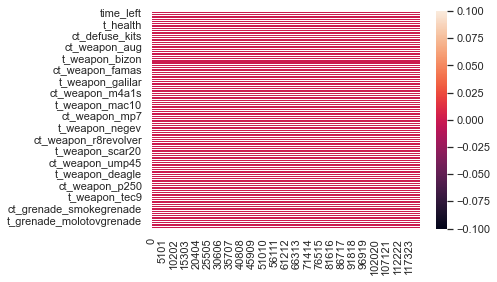

In [109]:
sns.heatmap(base.isnull().T)

## Total de Linhas na Base 

In [166]:
base['round_winner'].count()

122410

## Limpar e Normalizar os dados

In [167]:
base.groupby(['map']).count()

time_left  ct_score  t_score  ct_health  t_health  ct_money  \
map                                                                        
de_cache           145       145      145        145       145       145   
de_dust2         22144     22144    22144      22144     22144     22144   
de_inferno       23811     23811    23811      23811     23811     23811   
de_mirage        18576     18576    18576      18576     18576     18576   
de_nuke          19025     19025    19025      19025     19025     19025   
de_overpass      14081     14081    14081      14081     14081     14081   
de_train         13491     13491    13491      13491     13491     13491   
de_vertigo       11137     11137    11137      11137     11137     11137   

             t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  \
map                                                                             
de_cache         145         145        145             145               145   
de_dust2       22144       22144      22144           22144             22144   
de_inferno     23811       23811      23811           23811             23811   
de_mirage      18576       18576      18576           18576             18576   
de_nuke        19025       19025      19025           19025             19025   
de_overpass    14081       14081      14081           14081             14081   
de_train       13491       13491      13491           13491             13491   
de_vertigo     11137       11137      11137           11137             11137   

             t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
map                                                                          
de_cache                 145             145            145            145   
de_dust2               22144           22144          22144          22144   
de_inferno             23811           23811          23811          23811   
de_mirage              18576           18576          18576          18576   
de_nuke                19025           19025          19025          19025   
de_overpass            14081           14081          14081          14081   
de_train               13491           13491          13491          13491   
de_vertigo             11137           11137          11137          11137   

             t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  \
map                                                                       
de_cache              145            145           145              145   
de_dust2            22144          22144         22144            22144   
de_inferno          23811          23811         23811            23811   
de_mirage           18576          18576         18576            18576   
de_nuke             19025          19025         19025            19025   
de_overpass         14081          14081         14081            14081   
de_train            13491          13491         13491            13491   
de_vertigo          11137          11137         11137            11137   

             t_weapon_bizon  ct_weapon_cz75auto  t_weapon_cz75auto  \
map                                                                  
de_cache                145                 145                145   
de_dust2              22144               22144              22144   
de_inferno            23811               23811              23811   
de_mirage             18576               18576              18576   
de_nuke               19025               19025              19025   
de_overpass           14081               14081              14081   
de_train              13491               13491              13491   
de_vertigo            11137               11137              11137   

             ct_weapon_elite  t_weapon_elite  ct_weapon_famas  t_weapon_famas  \
map                                                                             
de_cache                 145             145  

In [168]:
base['round_winner'].value_counts()

T     62406
CT    60004
Name: round_winner, dtype: int64

In [169]:
base.describe().transpose()


count        mean         std   min     25%  \
time_left                    122410.0   97.886922   54.465238  0.01   54.92   
ct_score                     122410.0    6.709239    4.790362  0.00    3.00   
t_score                      122410.0    6.780435    4.823543  0.00    3.00   
ct_health                    122410.0  412.106568  132.293290  0.00  350.00   
t_health                     122410.0  402.714500  139.919033  0.00  322.00   
...                               ...         ...         ...   ...     ...   
t_grenade_incendiarygrenade  122410.0    0.019819    0.143933  0.00    0.00   
ct_grenade_molotovgrenade    122410.0    0.048011    0.227669  0.00    0.00   
t_grenade_molotovgrenade     122410.0    1.352095    1.663246  0.00    0.00   
ct_grenade_decoygrenade      122410.0    0.027694    0.169531  0.00    0.00   
t_grenade_decoygrenade       122410.0    0.025750    0.164162  0.00    0.00   

                                50%       75%    max  
time_left                     94.91  166.9175  175.0  
ct_score                       6.00   10.0000   32.0  
t_score                        6.00   10.0000   33.0  
ct_health                    500.00  500.0000  500.0  
t_health                     500.00  500.0000  600.0  
...                             ...       ...    ...  
t_grenade_incendiarygrenade    0.00    0.0000    3.0  
ct_grenade_molotovgrenade      0.00    0.0000    3.0  
t_grenade_molotovgrenade       1.00    2.0000    5.0  
ct_grenade_decoygrenade        0.00    0.0000    3.0  
t_grenade_decoygrenade         0.00    0.0000    2.0  

[92 rows x 8 columns]

In [170]:
base.dtypes

time_left                    float64
ct_score                       int64
t_score                        int64
map                           object
ct_health                      int64
                              ...   
ct_grenade_molotovgrenade      int64
t_grenade_molotovgrenade       int64
ct_grenade_decoygrenade        int64
t_grenade_decoygrenade         int64
round_winner                  object
Length: 94, dtype: object

In [171]:
pd.set_option('display.max_columns', None)

In [172]:
base.head()

time_left  ct_score  t_score       map  ct_health  t_health  ct_money  \
0     175.00         0        0  de_dust2        500       500      4000   
1     156.03         0        0  de_dust2        500       500       600   
2      96.03         0        0  de_dust2        391       400       750   
3      76.03         0        0  de_dust2        391       400       750   
4     174.97         1        0  de_dust2        500       500     18350   

   t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  \
0     4000           0          0               0                 5   
1      650           0          0               1                 5   
2      500           0          0               1                 4   
3      500           0          0               1                 4   
4    10750           0          0               1                 5   

   t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
0                5               0              0              0   
1                5               0              0              0   
2                4               0              0              0   
3                4               0              0              0   
4                5               0              0              0   

   t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  t_weapon_bizon  \
0             0              0             0                0               0   
1             0              0             0                0               0   
2             0              0             0                0               0   
3             0              0             0                0               0   
4             0              0             0                0               0   

   ct_weapon_cz75auto  t_weapon_cz75auto  ct_weapon_elite  t_weapon_elite  \
0                   0                  0                0               0   
1                   0                  0                0               0   
2                   0                  0                0               0   
3                   0                  0                0               0   
4                   0                  0                0               0   

   ct_weapon_famas  t_weapon_famas  ct_weapon_g3sg1  t_weapon_g3sg1  \
0                0               0                0               0   
1                0               0                0               0   
2                0               0                0               0   
3                0               0                0               0   
4                0               0                0               0   

   ct_weapon_galilar  t_weapon_galilar  ct_weapon_glock  t_weapon_glock  \
0                  0                 0                0               5   
1                  0                 0                0               5   
2                  0                 0                0               4   
3                  0                 0                0               3   
4                  0                 0                0               5   

   ct_weapon_m249  t_weapon_m249  ct_weapon_m4a1s  t_weapon_m4a1s  \
0               0              0                0               0   
1               0              0                0               0   
2               0              0                0               0   
3               0              0                0               0   
4               0              0                0               0   

   ct_weapon_m4a4  t_weapon_m4a4  ct_weapon_mac10  t_weapon_mac10  \
0               0              0                0               0   
1               0              0                0               0   
2               0              0                0               0   
3               0              0                0               0   
4               0              0                0               0   

   ct_weapon_mag7  t_weapon_mag7  ct_weapon_mp5sd  t

<Figure size 1440x360 with 0 Axes>

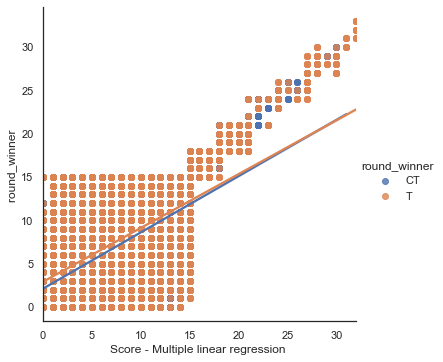

In [173]:
plt.figure(figsize=(20,5))

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=base,
    x="ct_score", y="t_score", hue="round_winner",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Score - Multiple linear regression ", "round_winner ")

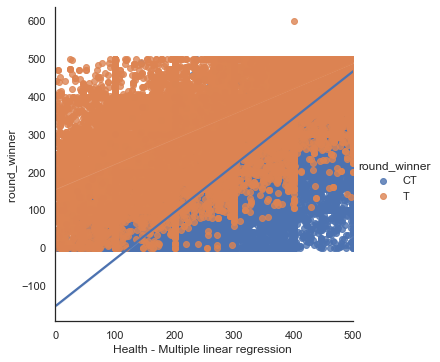

In [174]:

# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(
    data=base,
    x="ct_health", y="t_health", hue="round_winner",
    height=5
)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Health - Multiple linear regression ", "round_winner ")

<AxesSubplot:xlabel='ct_health', ylabel='Count'>

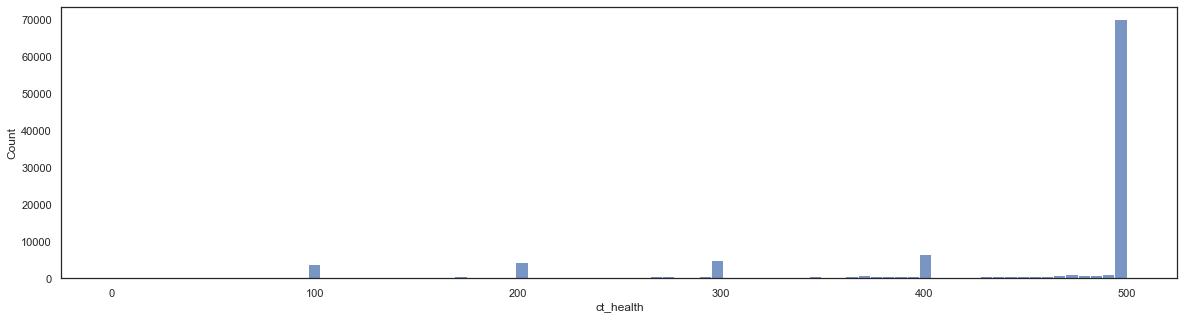

In [175]:

plt.figure(figsize=(20,5))

sns.histplot(base[base['t_health']<=0.2 * 1e8 ]['ct_health'])

## Padronização de CT e T 

Resolvi que para andar com o processo de analise exploratoria, preciso formatar os dados de string para tipos inteiros,usei um metodo de aplicação de apply para remover tudo que for string ct para 0 e T para 1, quero ver como é o comportamento do processo de t_score tambem, como ele se comporta em relação ao quantidade total por partida 

In [176]:
base['round_winner'] = base['round_winner'].apply(lambda var: 0 if var == 'CT' else 1)

<AxesSubplot:xlabel='t_score', ylabel='Count'>

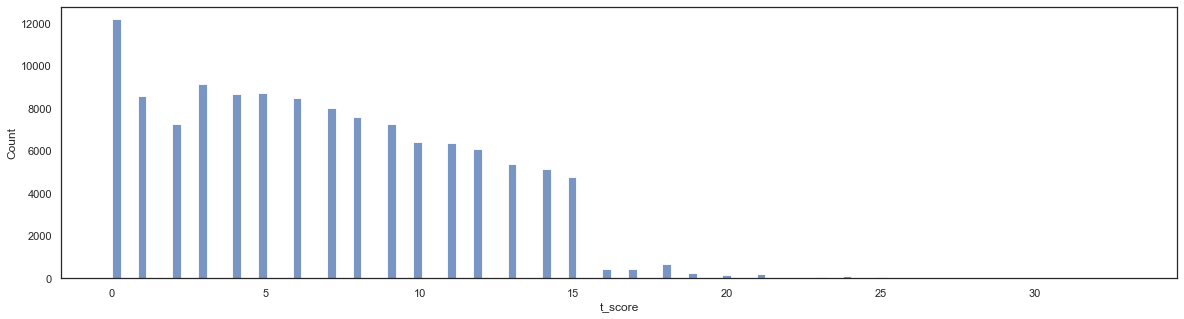

In [177]:

plt.figure(figsize=(20,5))

sns.histplot(base[base['t_score']<=0.2 * 1e8 ]['t_score'])

## Automação Exploração de Dados (profiling)

In [7]:
!pip install pandas-profiling

Looking in indexes: https://pypi.org/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/pypi
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached htmlmin-0.1.12.tar.gz (19 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=fbedcdad9c560dda683b0e4990ac373bfa7ea24960ee0e4124247e3395d3b372
  Stored in directory: c:\users\2104944461\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295204 sha256=94ef622521db0bbbf895399af2ed0f749612387e0af52d76334aa4e753e6f073
  Stored in directory: c:\users\2104944461\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74
Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling Mark

ERROR: Could not install packages due to an OSError: [WinError 5] Acesso negado: 'C:\\Users\\2104944461\\Anaconda3\\Lib\\site-packages\\~arkupsafe\\_speedups.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\users\2104944461\anaconda3\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.org/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/pypi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.0.1 which is incompatible.



  Using cached pandas_profiling-3.1.0-py2.py3-none-any.whl (261 kB)
  Using cached htmlmin-0.1.12-py3-none-any.whl
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
  Using cached missingno-0.5.0-py3-none-any.whl (8.8 kB)
  Using cached multimethod-1.6-py3-none-any.whl (9.4 kB)
  Using cached phik-0.12.0-cp38-cp38-win_amd64.whl (659 kB)
  Using cached MarkupSafe-2.0.1-cp38-cp38-win_amd64.whl (14 kB)
  Using cached visions-0.7.4-py3-none-any.whl (102 kB)
  Using cached pydantic-1.8.2-cp38-cp38-win_amd64.whl (2.0 MB)
  Using cached ImageHash-4.2.1-py2.py3-none-any.whl
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.
  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0


You should consider upgrading via the 'c:\users\2104944461\anaconda3\python.exe -m pip install --upgrade pip' command.


In [8]:
from  pandas_profiling import ProfileReport

In [13]:
profile = ProfileReport(base)
profile.to_widgets()

C:\Users\2104944461\Anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\2104944461\Anaconda3\lib\site-packages\scipy\stats\stats.py:4596: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(var) / np.sqrt(2)))
C:\Users\2104944461\Anaconda3\lib\site-packages\missingno\missingno.py:250: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=fontsize)
C:\Users\2104944461\Anaconda3\lib\site-packages\pandas_profiling\model\missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profil

TraitError: n_rows and n_columns must be positive integer

## Automação Exploração de Dados (sweetviz)

In [22]:
!pip3 install sweetviz
!pip3 install ipywidgets

Looking in indexes: https://pypi.org/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/pypi

You should consider upgrading via the 'c:\users\2104944461\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\2104944461\anaconda3\python.exe -m pip install --upgrade pip' command.


Looking in indexes: https://pypi.org/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/simple, http://nexus.viavarejo.com.br/repository/pypi-data-science/pypi


## Percepções

PS: Percebi que usando sweetviz poderia automatizar o processo de EDA, poderia ter uma visualização mais completa olhando para todos os pontos que tive no começo, acredito que dessa forma, pouco tempo no processo de descobertas, com essa tecnica consigo entrar mais no detalhe e ter a percepção que o padrão das partidas variam de acordo com time e em relação a vida,dinheiro, tipo de arma, e classificação de ct ou t.

In [24]:
# por favor rode o sweetviz e veja o resultado da analise
try:
  import sweetviz as sv
  my_report = sv.analyze(base)
except: 
  print("Falha ao Instalar o Sweetviz")

## Observação sobre ct_defuse_kit 
Percebi que o grafico de barras apresenta uma distribuição em barras com os seguintes dados 

 TOP| CATEGORIES
 ----| ----
042 | 09534%
127 | 40022%
217 | 21814%
315 | 38613%
412 | 01310%
58 | 2987%



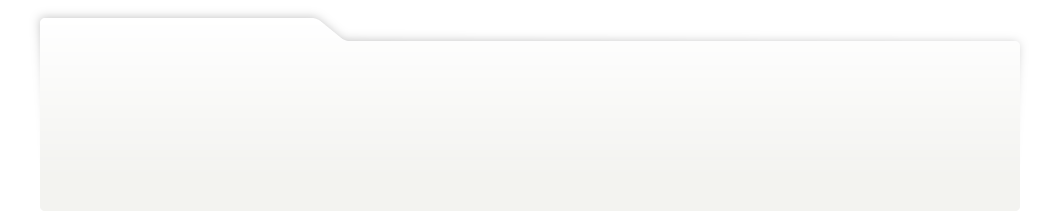
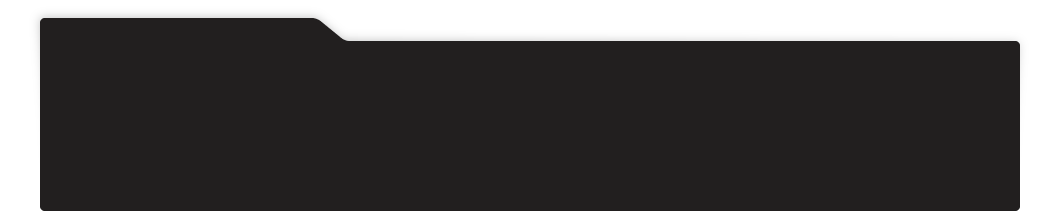
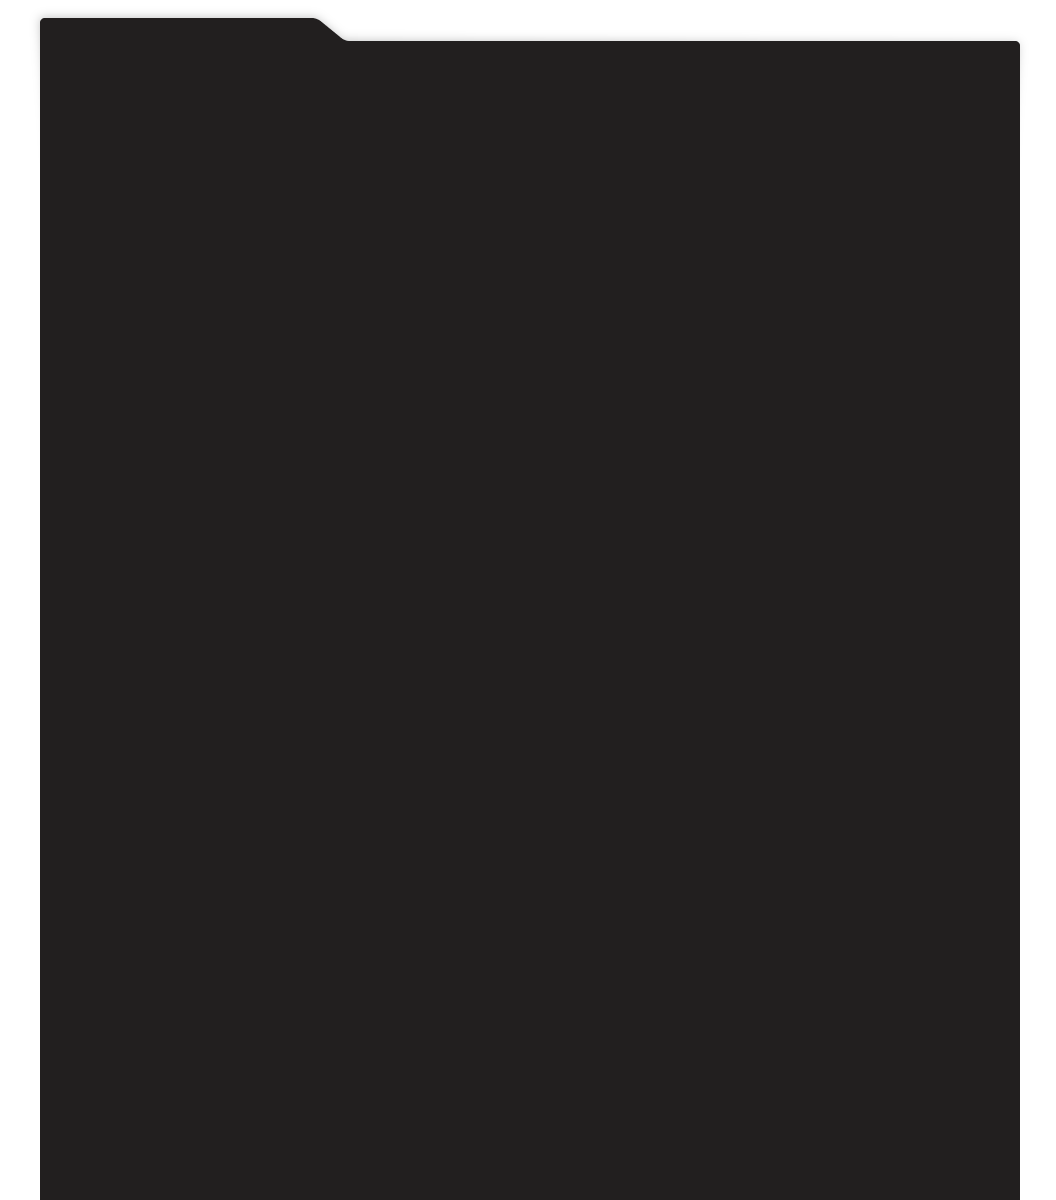
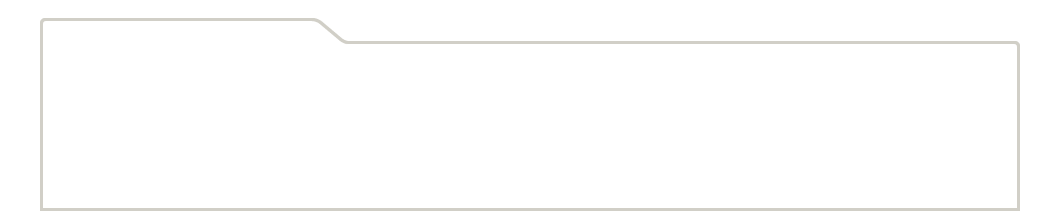
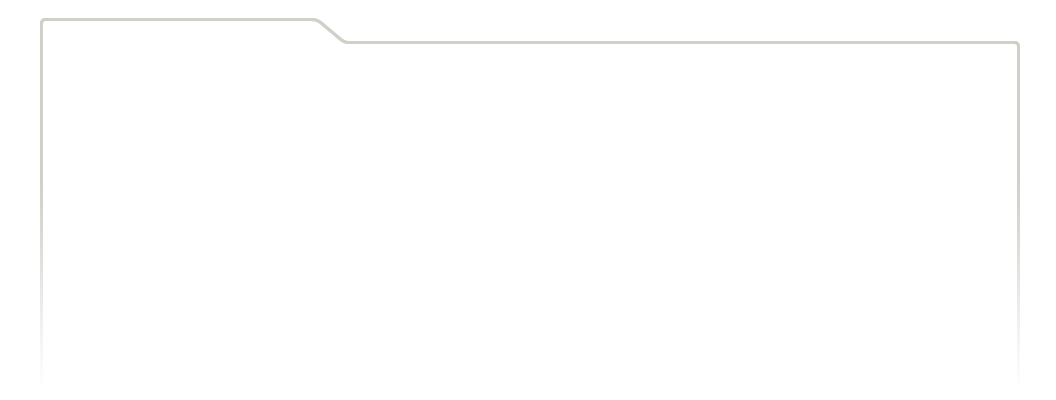
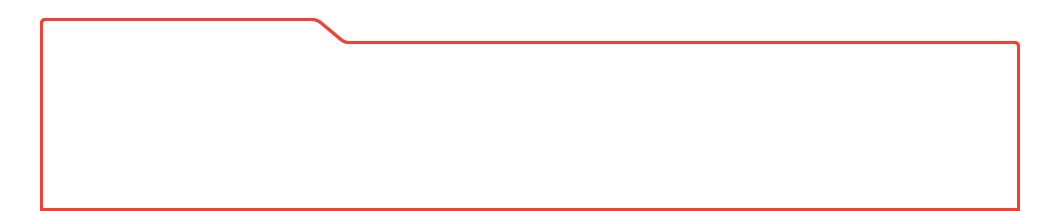
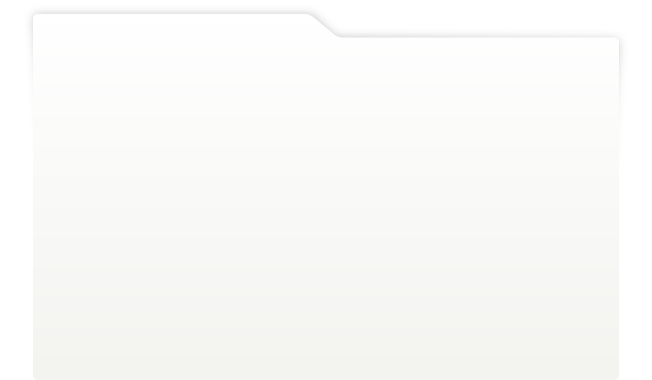
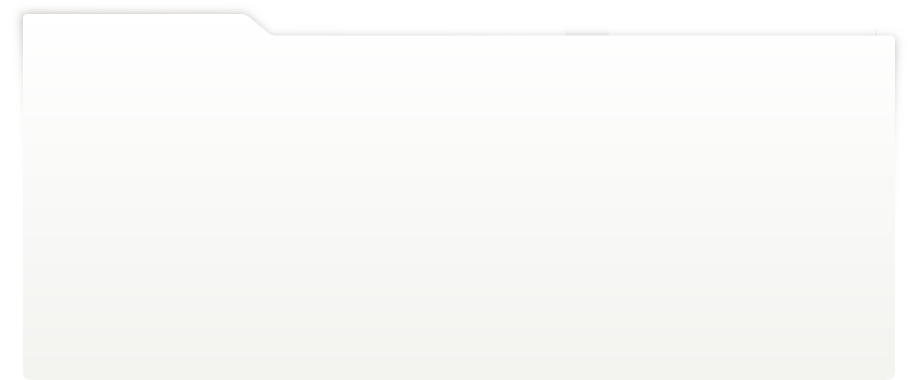
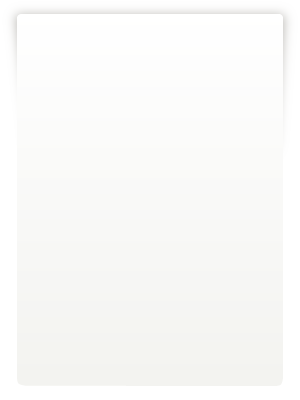
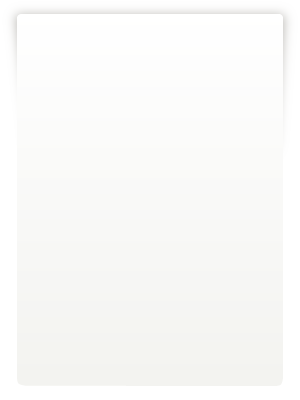
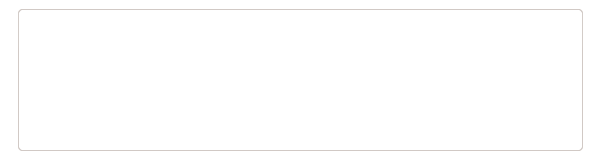
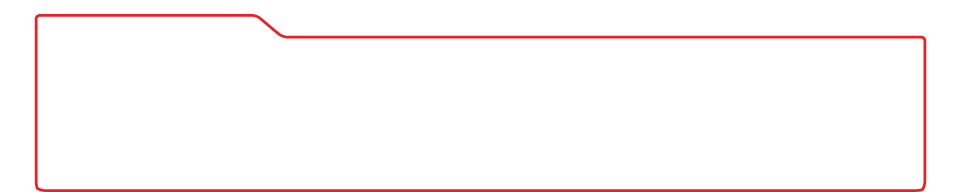
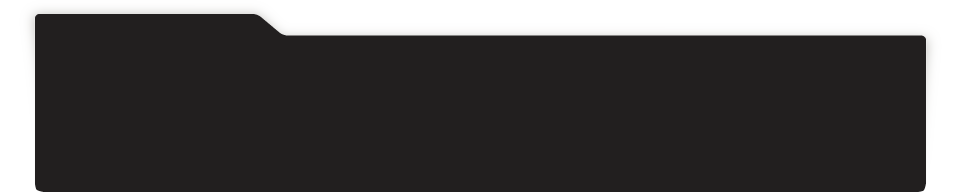
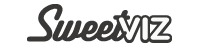
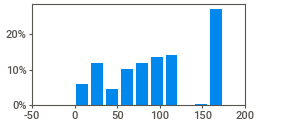
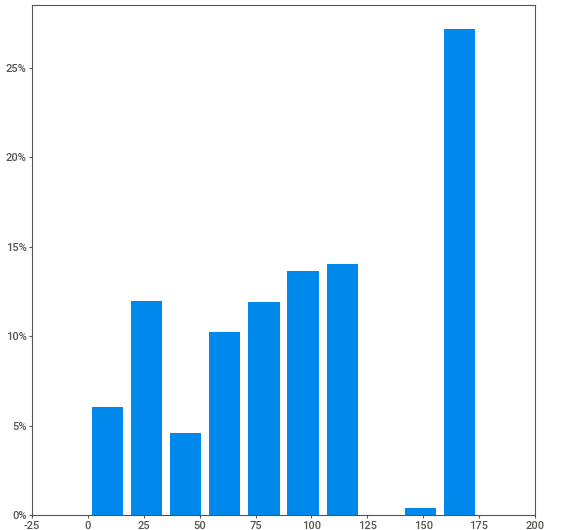
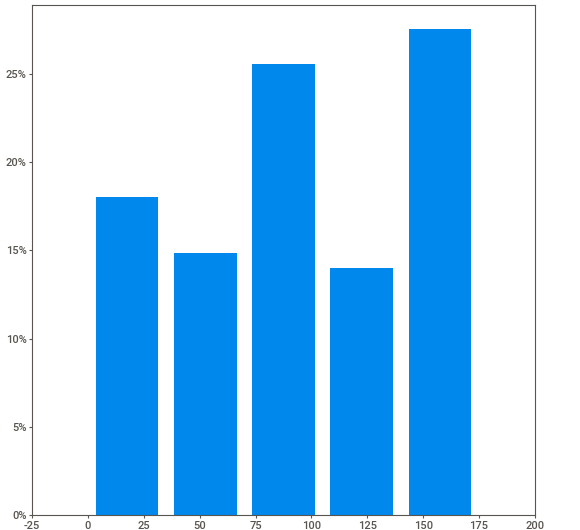
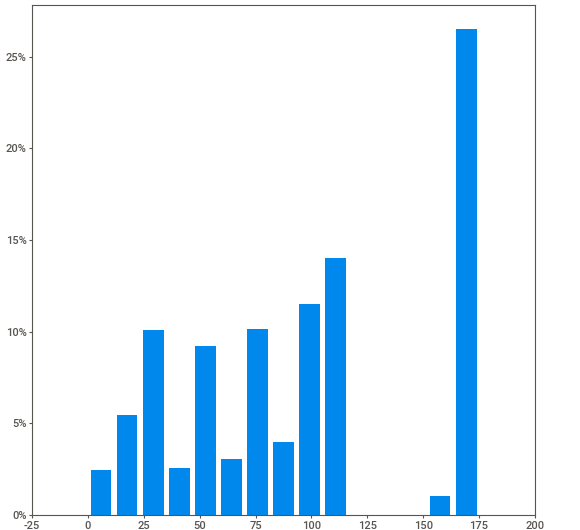
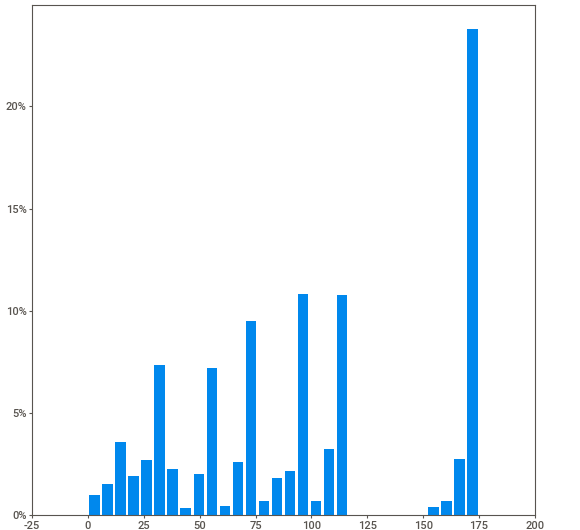
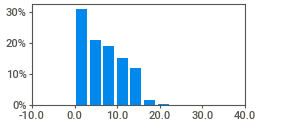
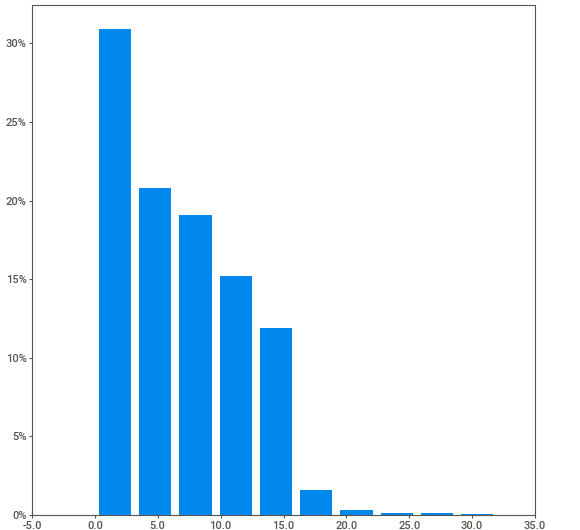
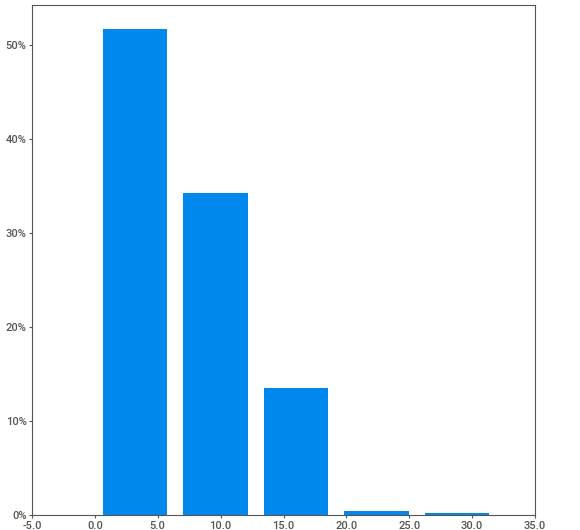
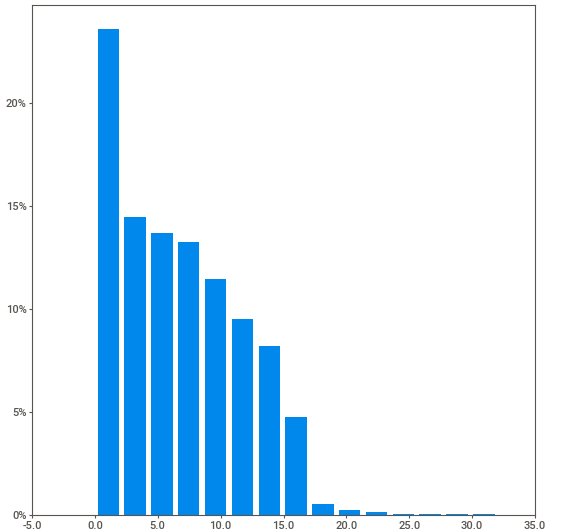
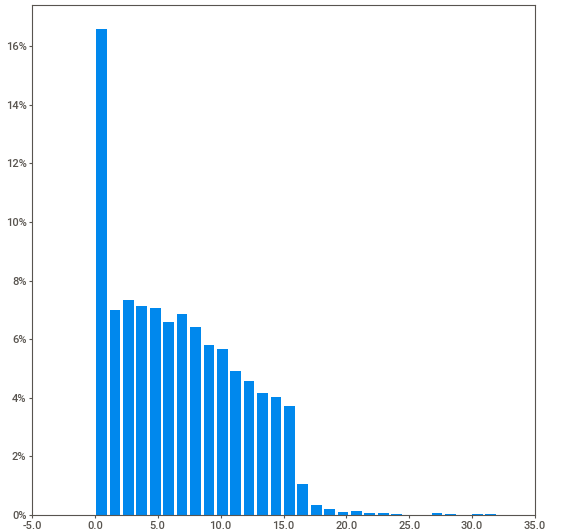
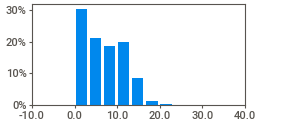
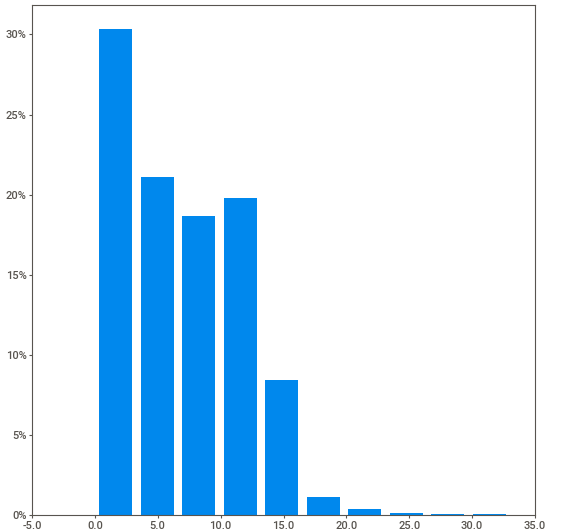
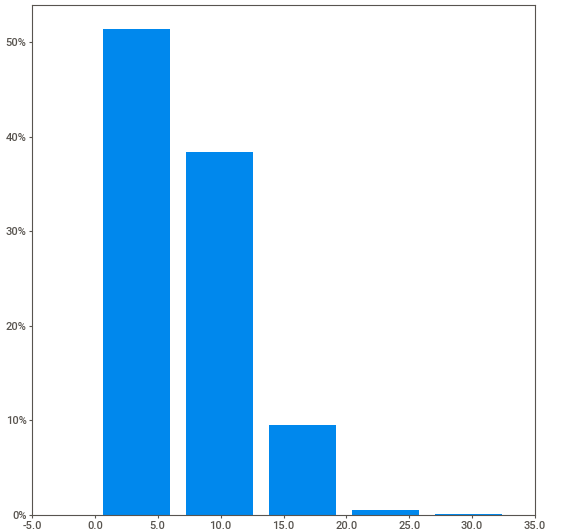
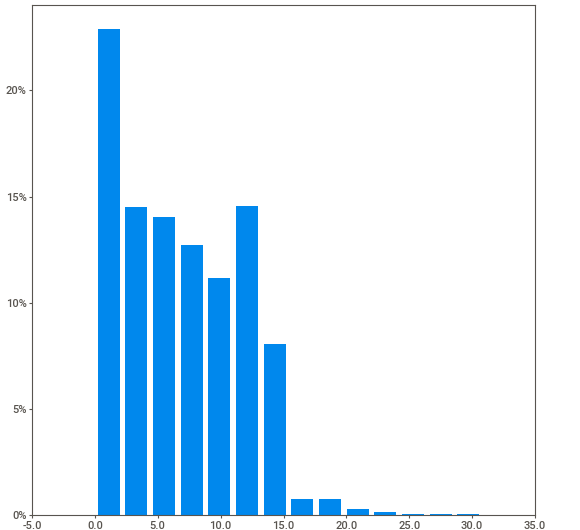
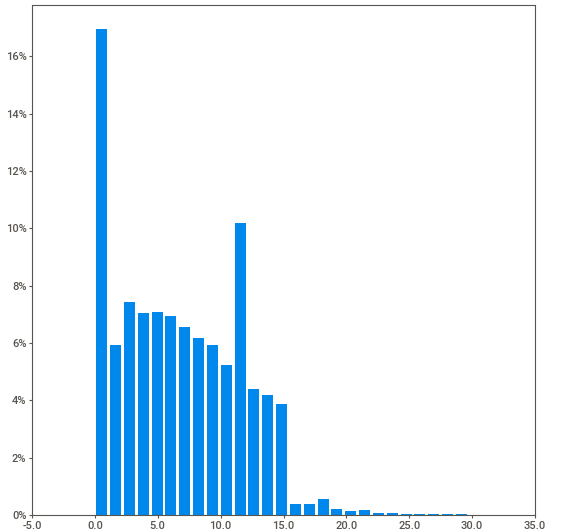
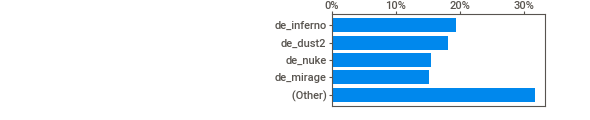
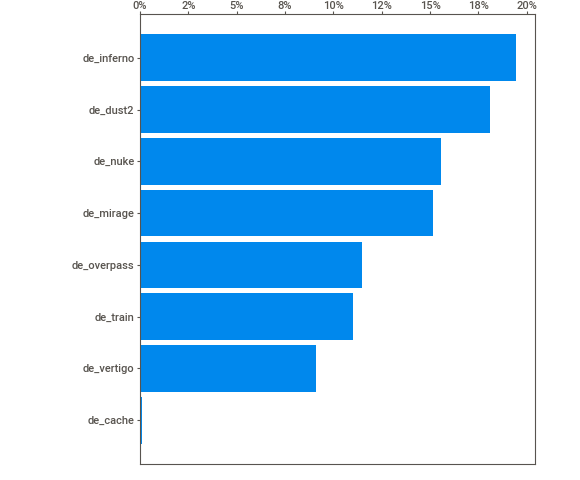
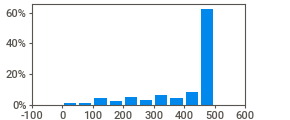
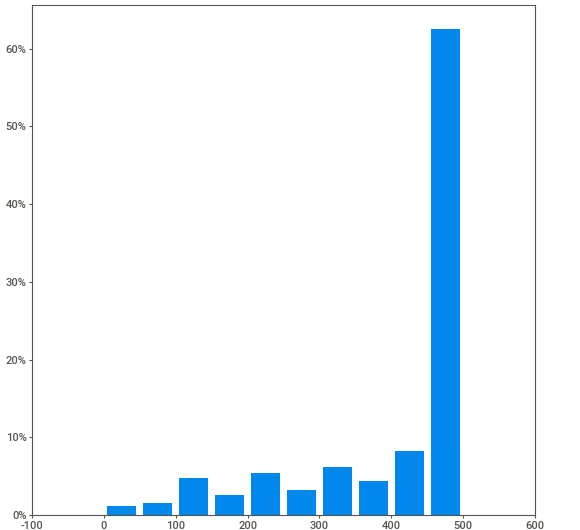
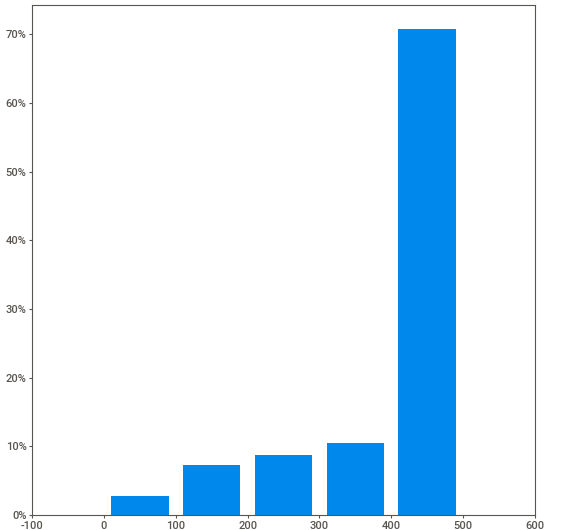
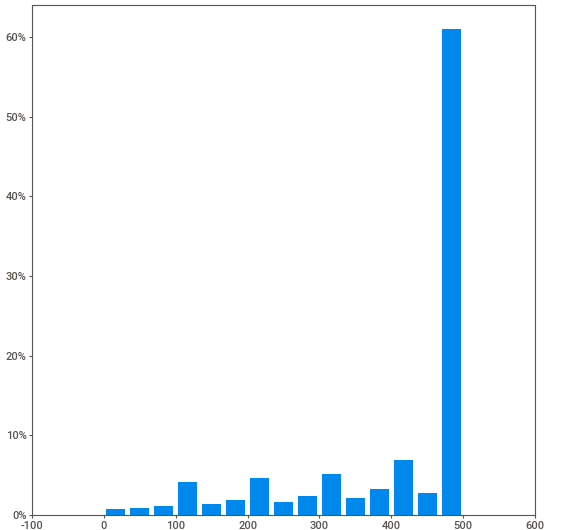
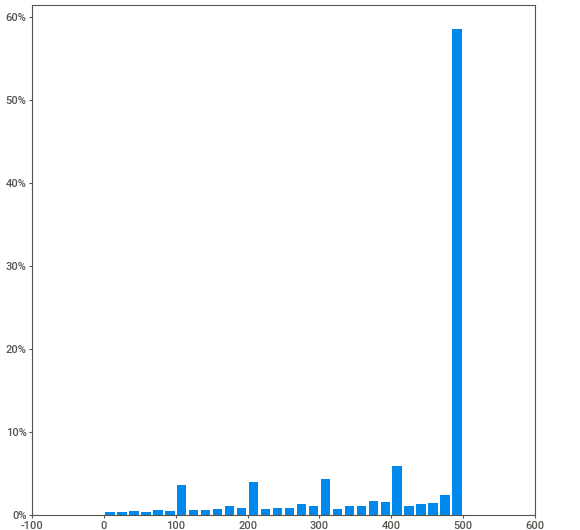
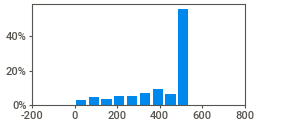
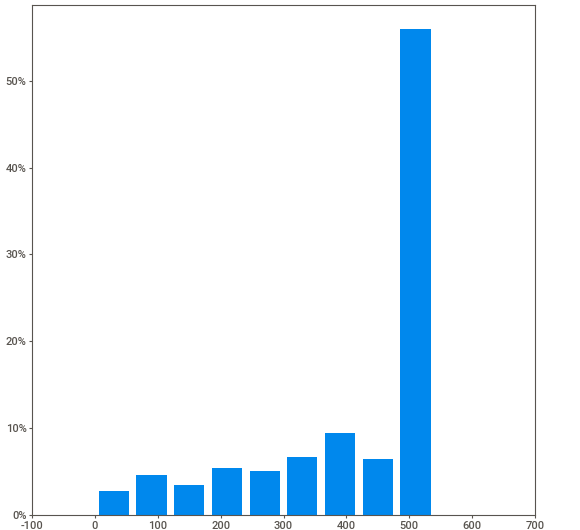
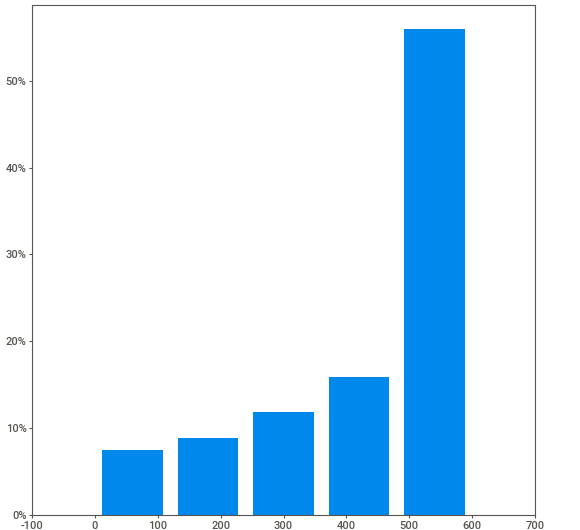
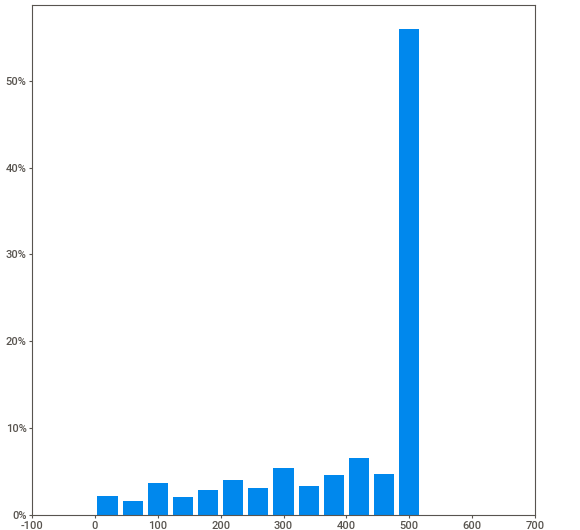
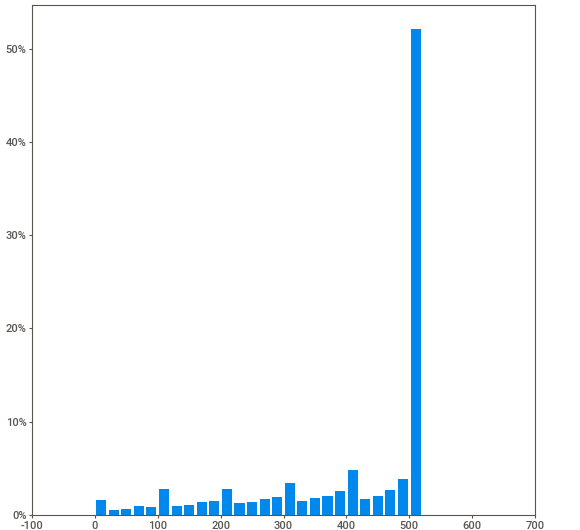
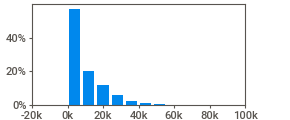
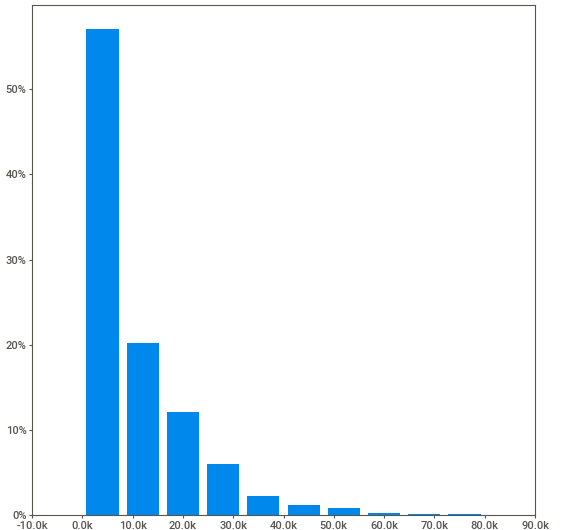
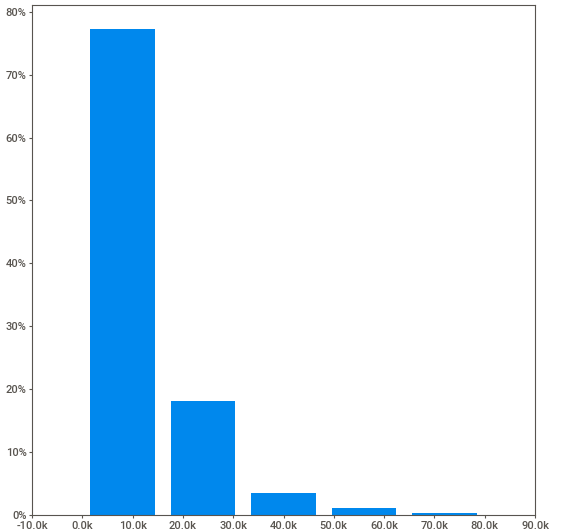
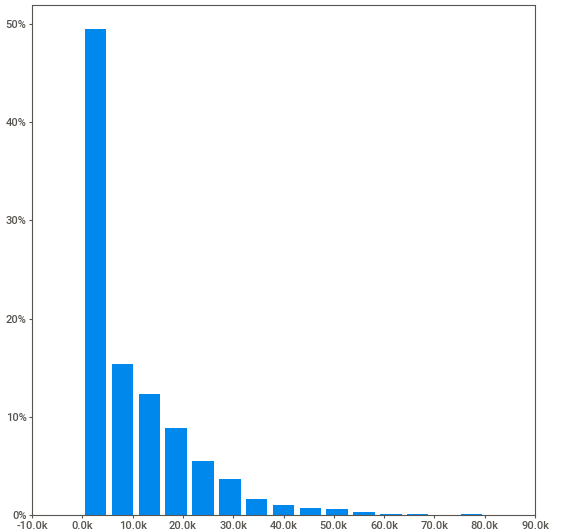
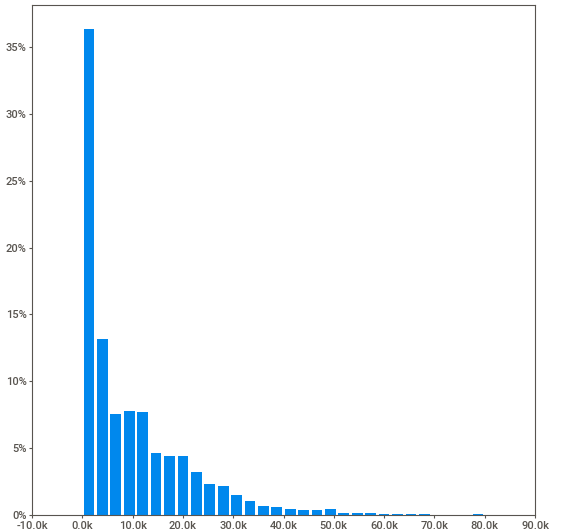
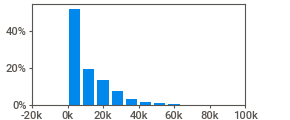
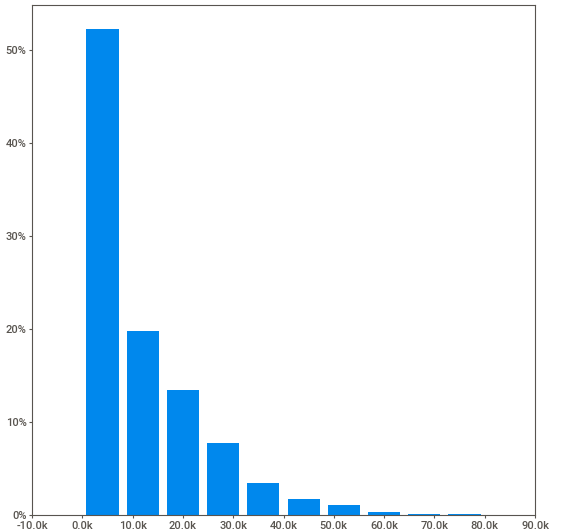
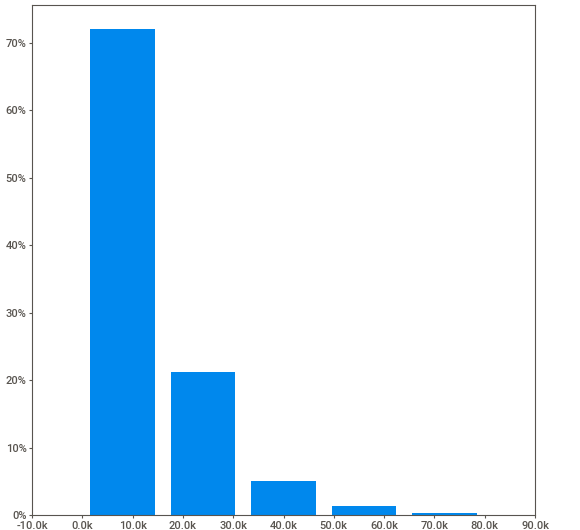
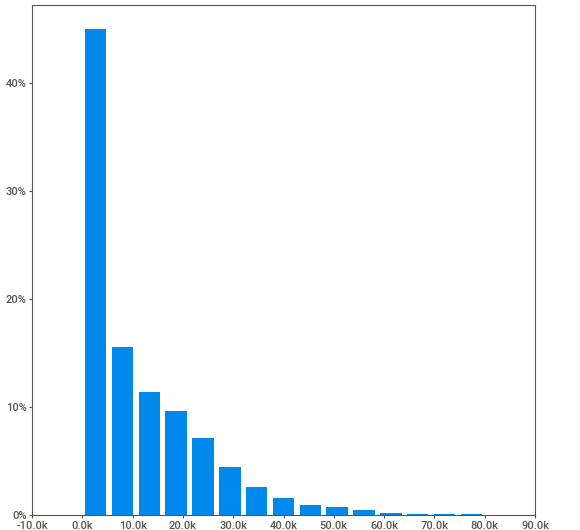
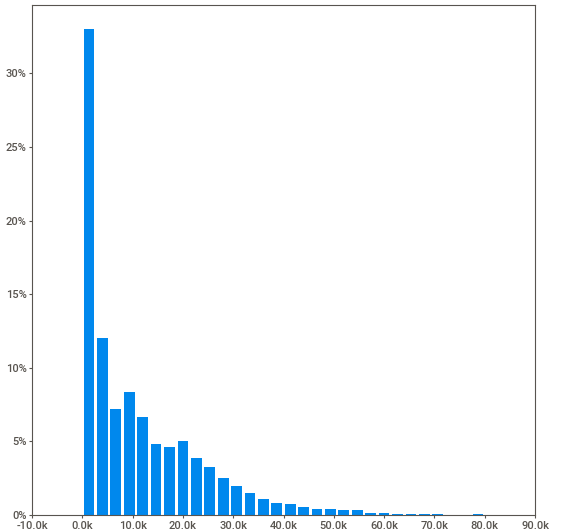
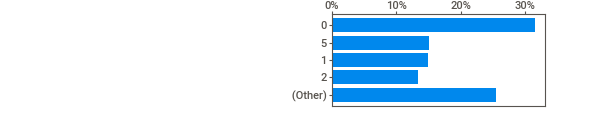
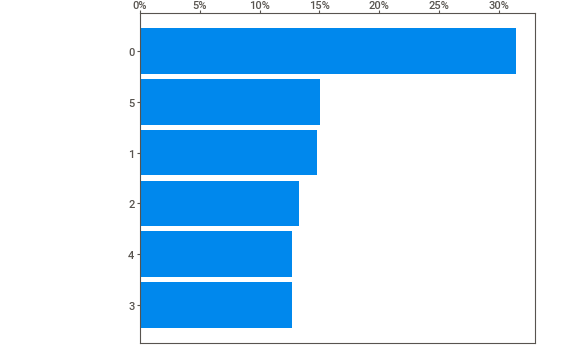
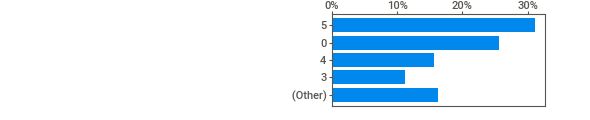
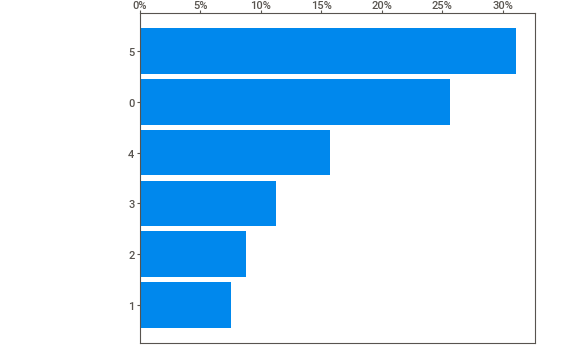
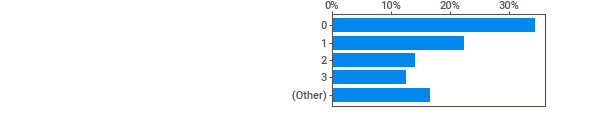
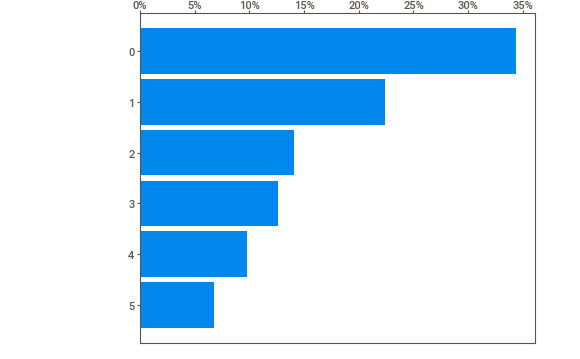
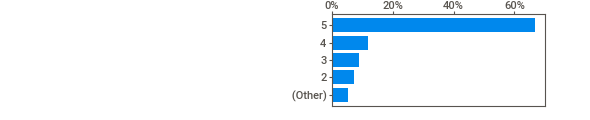
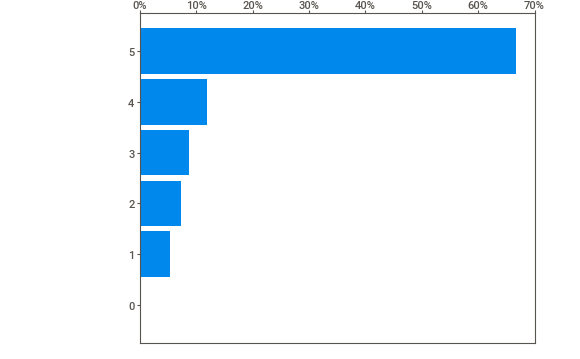
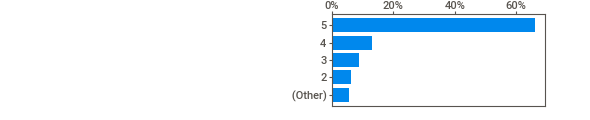
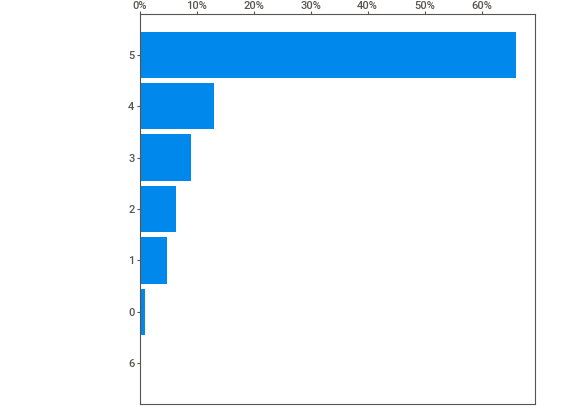
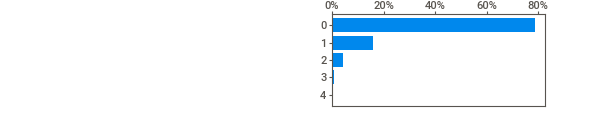
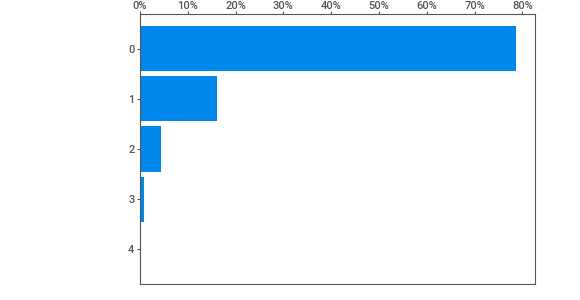
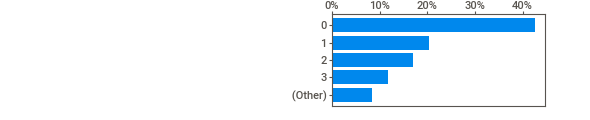
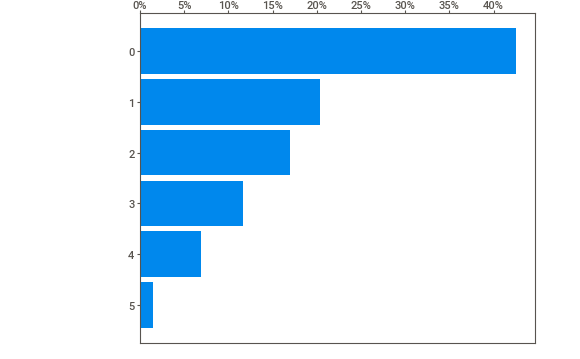
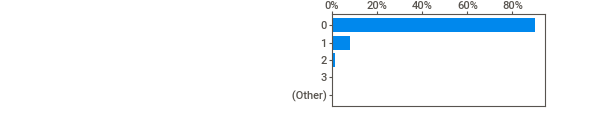
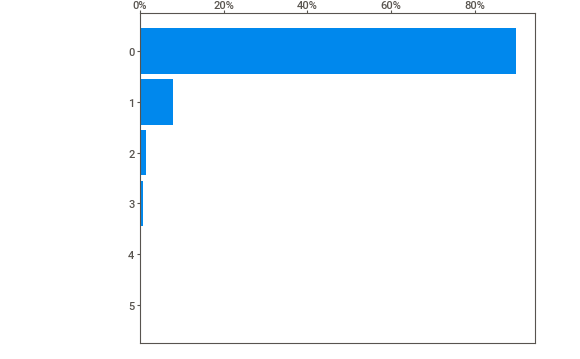
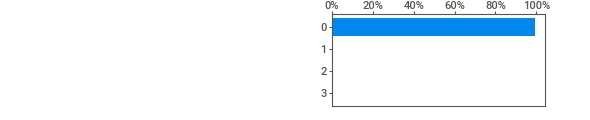
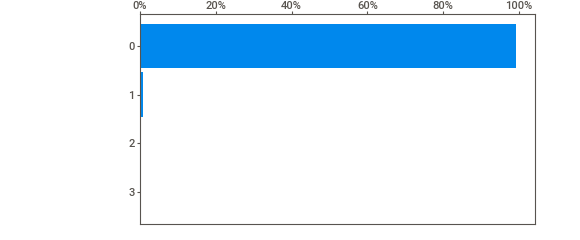
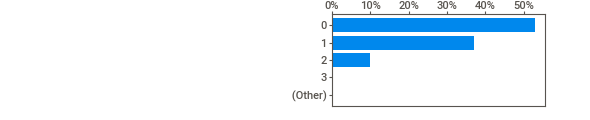
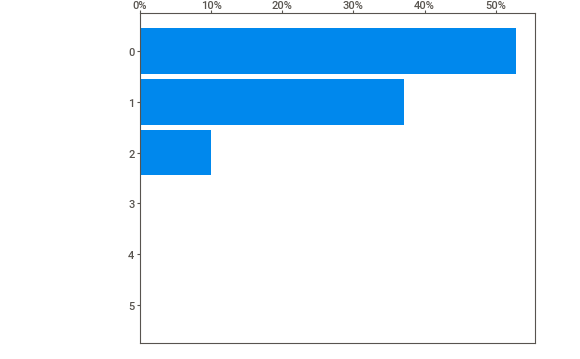
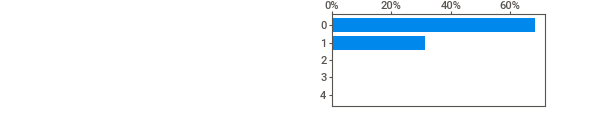
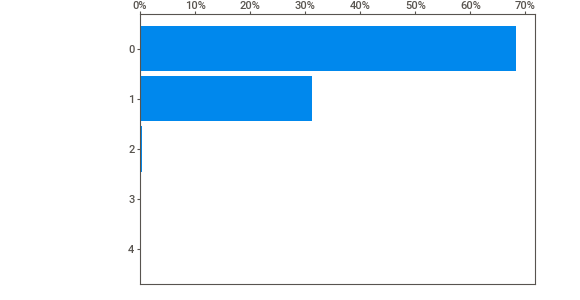
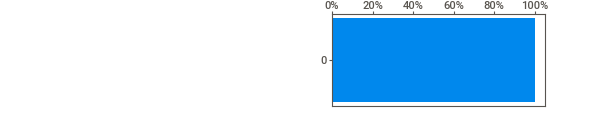
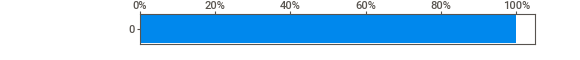
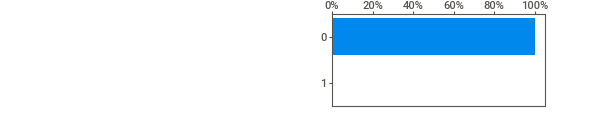
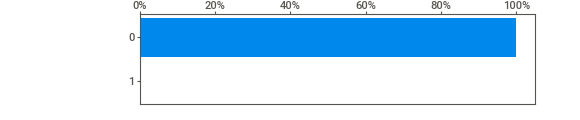
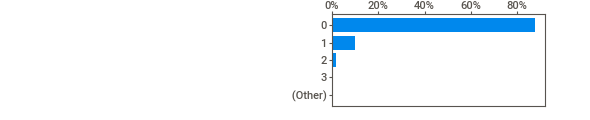
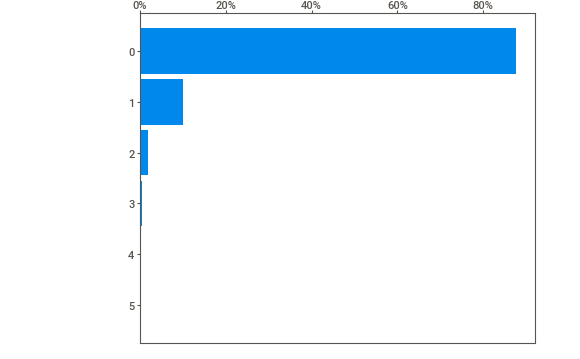
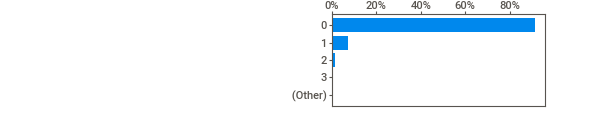
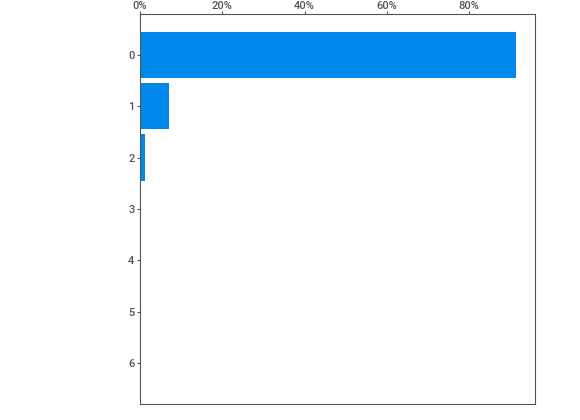
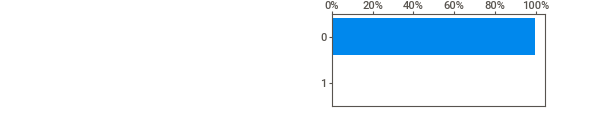
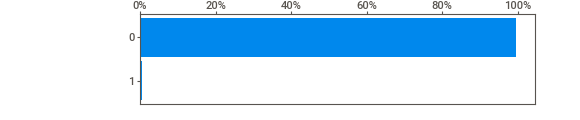
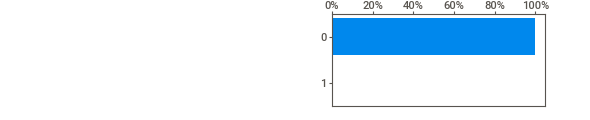
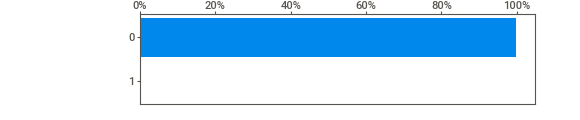
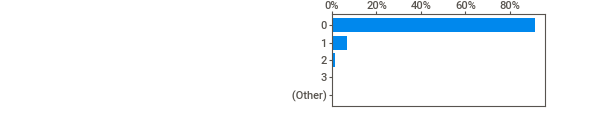
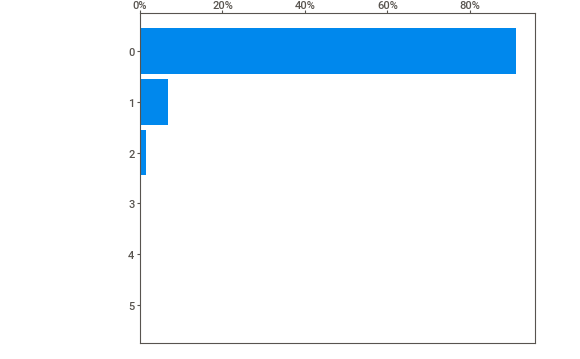
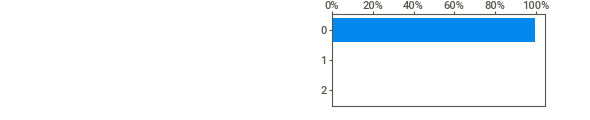
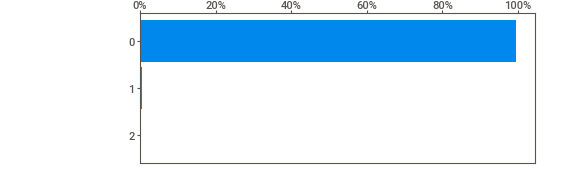
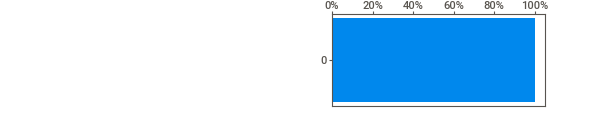
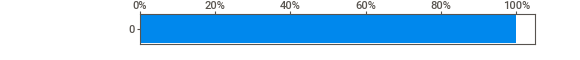
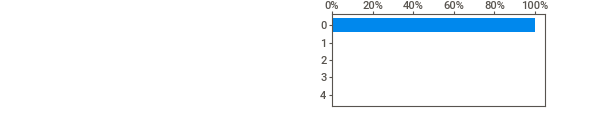
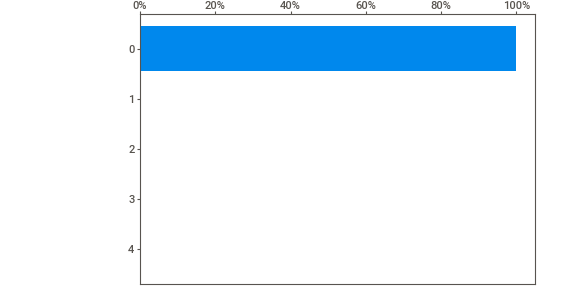
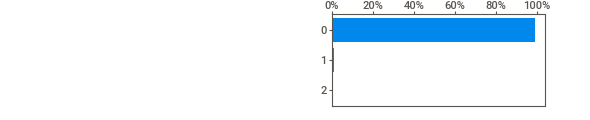
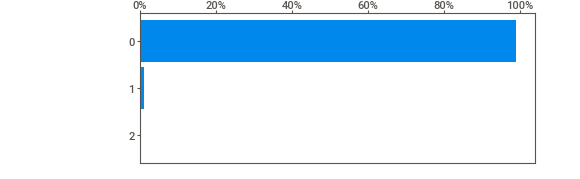
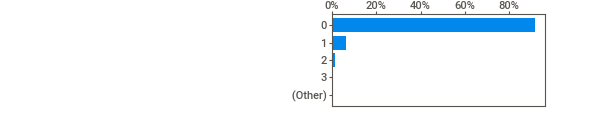
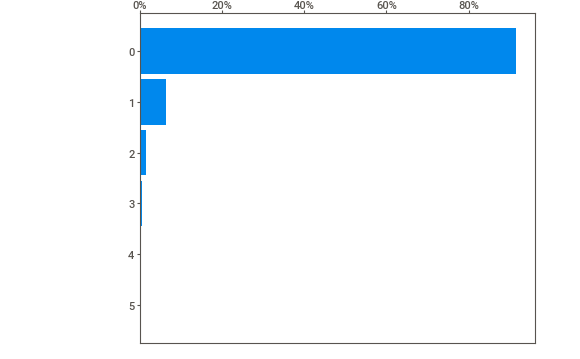
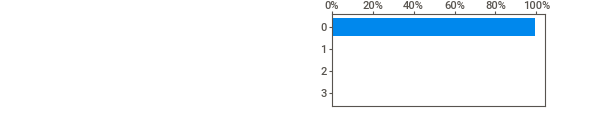
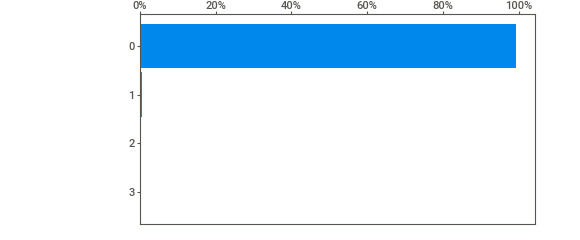
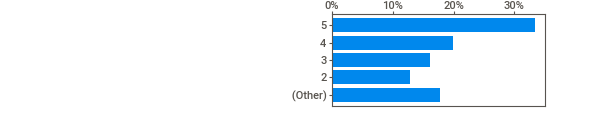
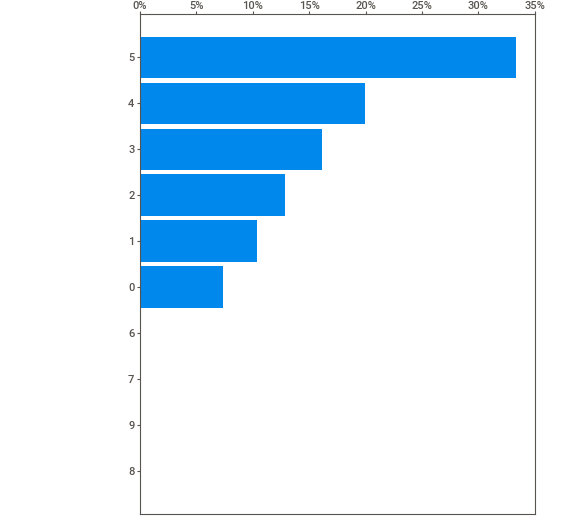
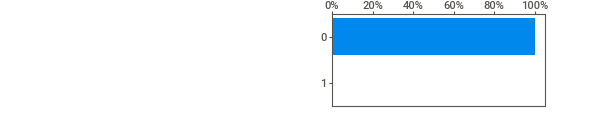
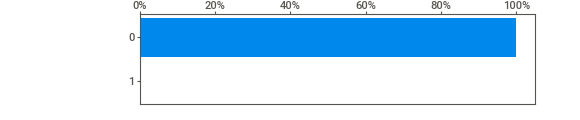
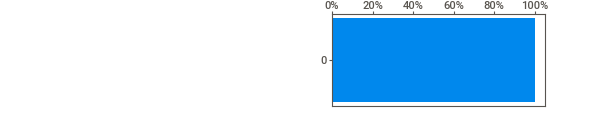
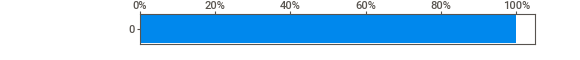
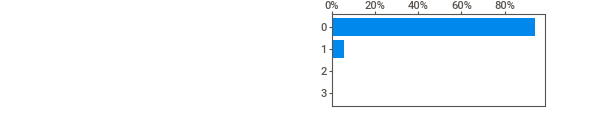
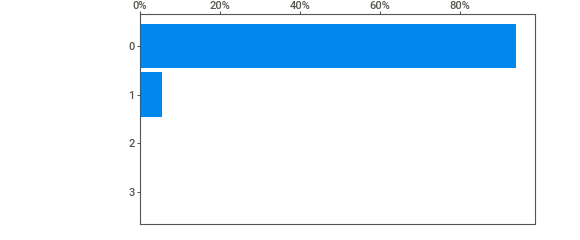
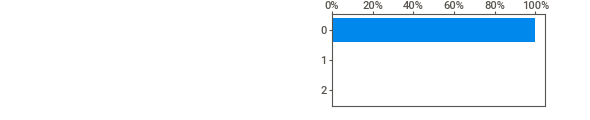
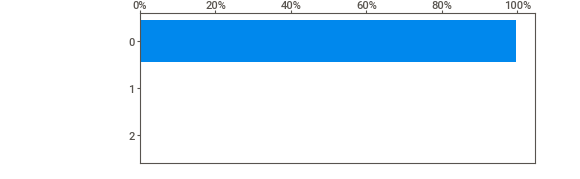
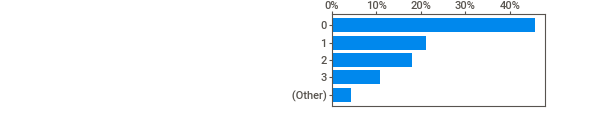
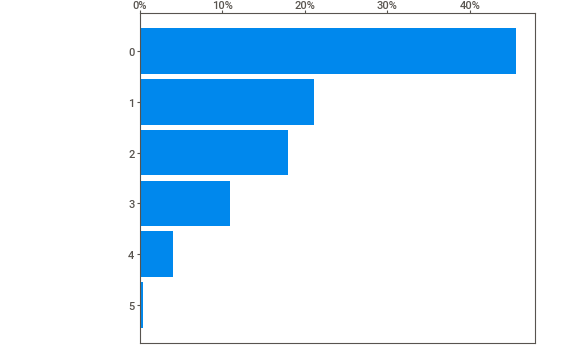
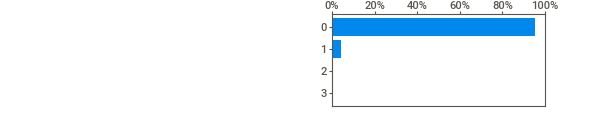
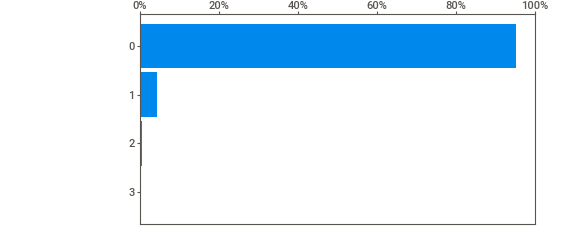
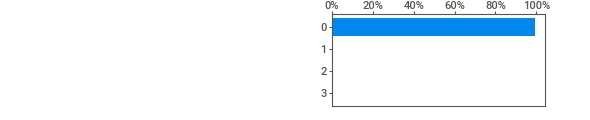
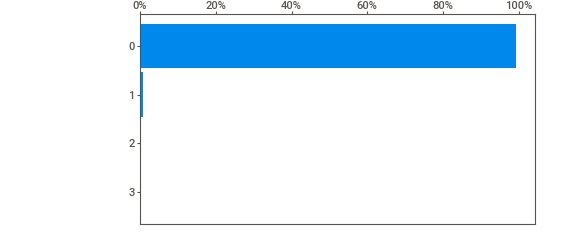
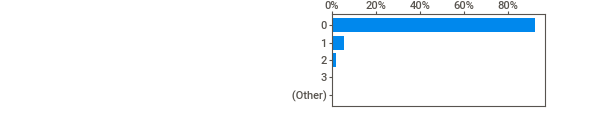
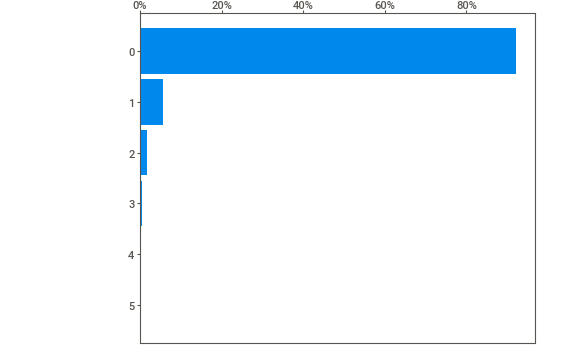
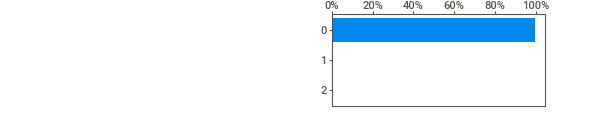
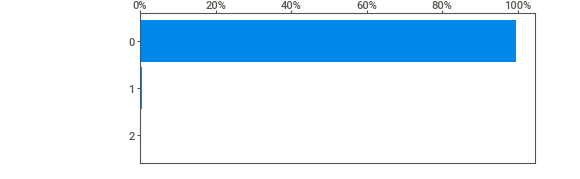
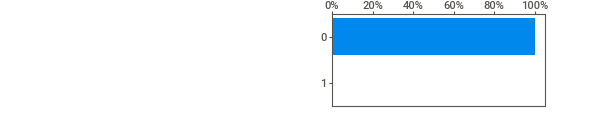
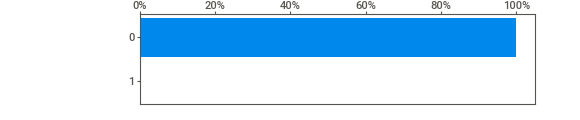
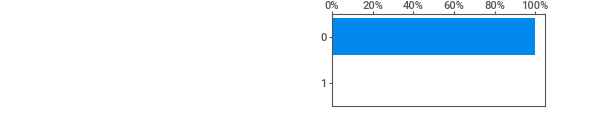
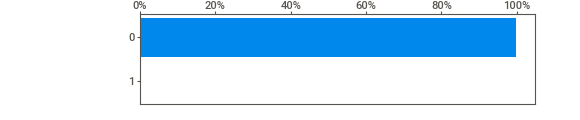
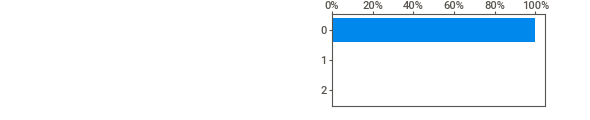
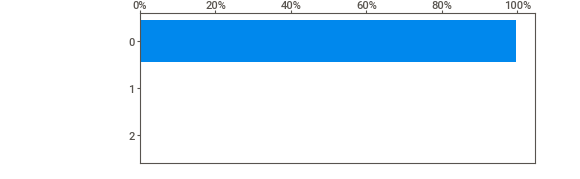
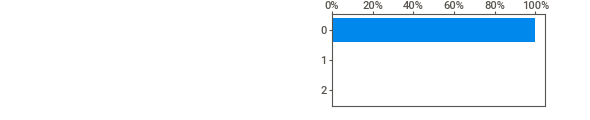
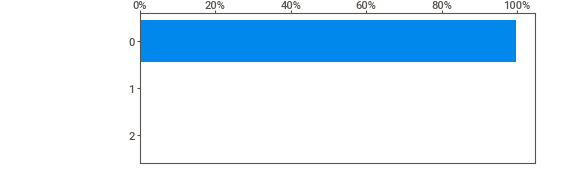
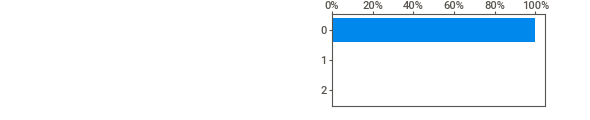
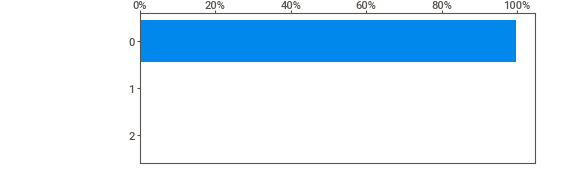
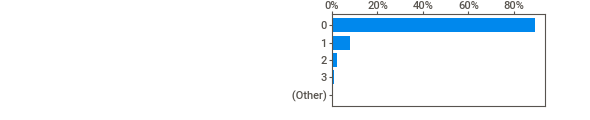
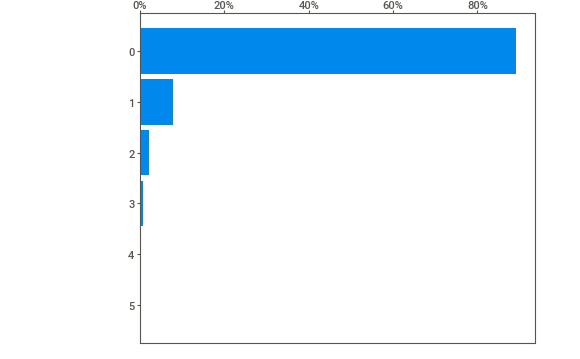
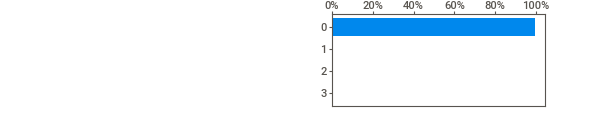
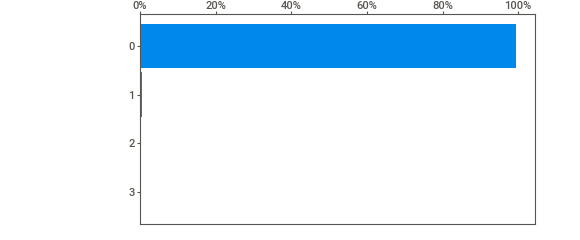
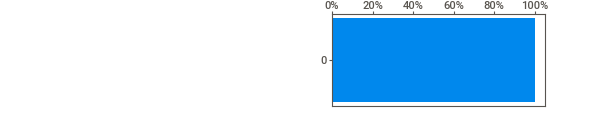
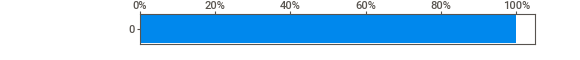
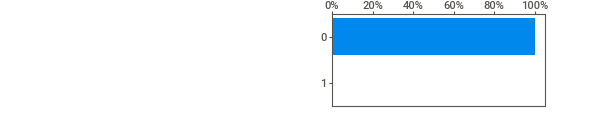
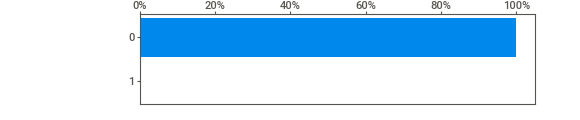
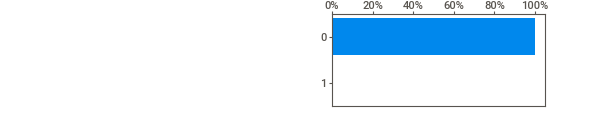
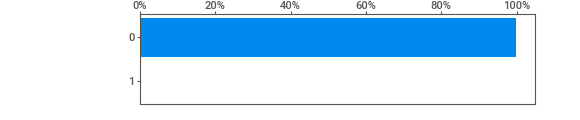
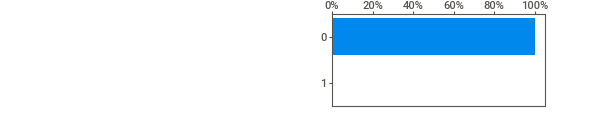
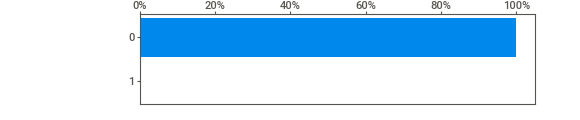
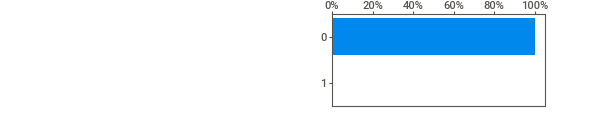
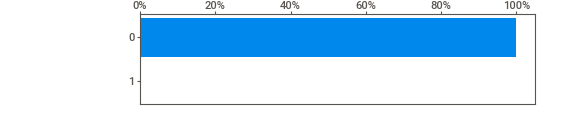
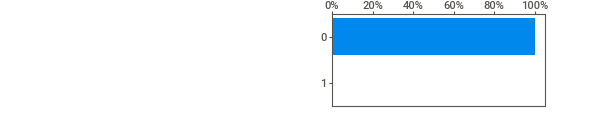
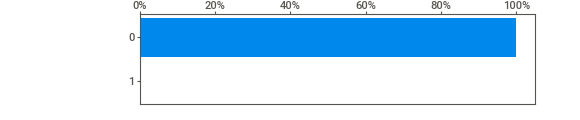
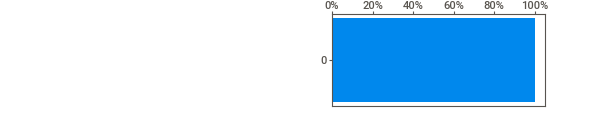
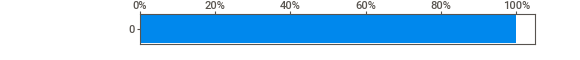
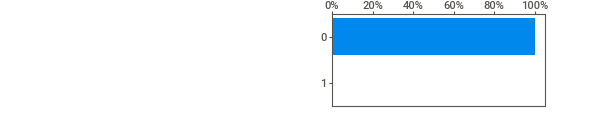
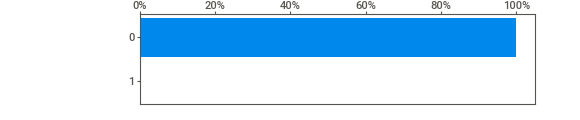
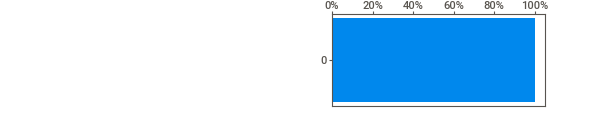
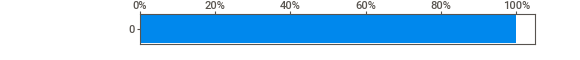
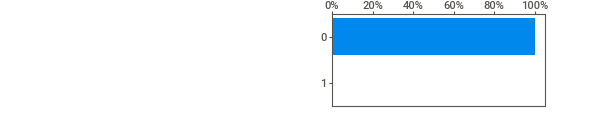
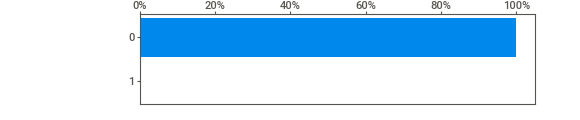
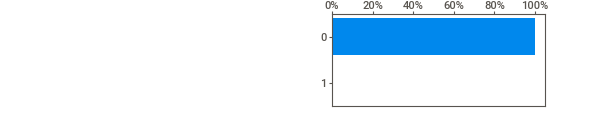
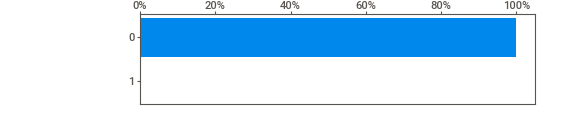
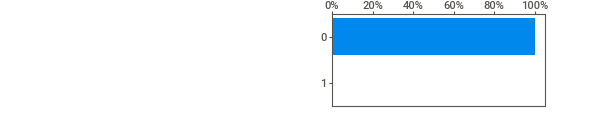
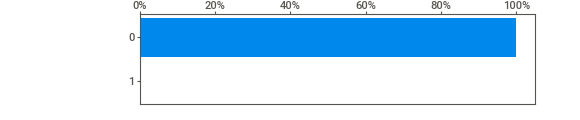
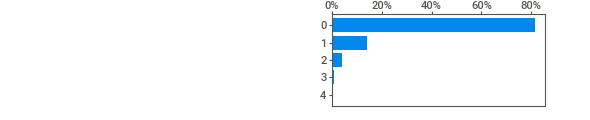
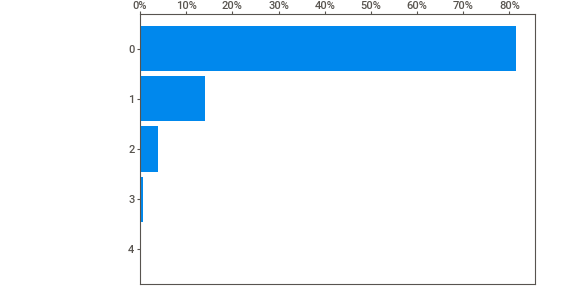
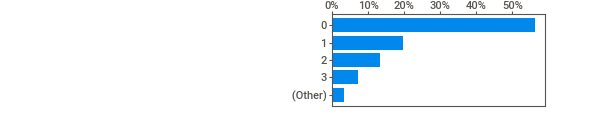
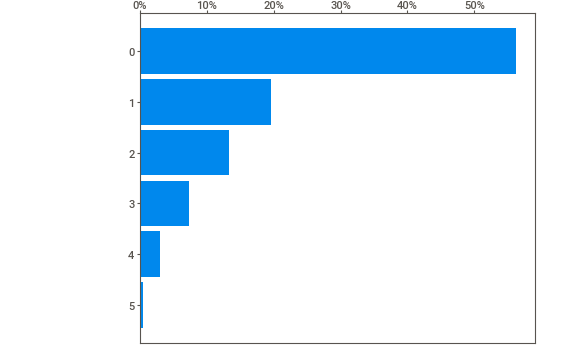
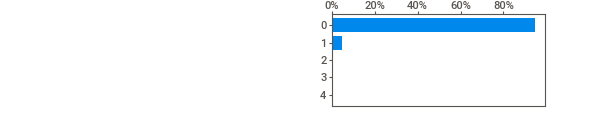
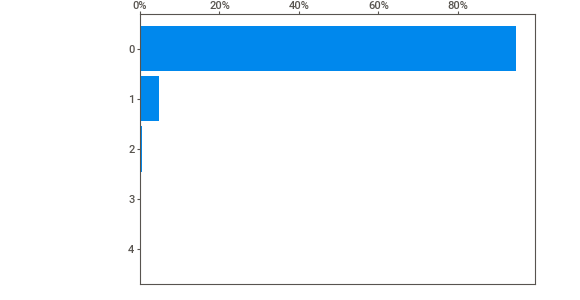
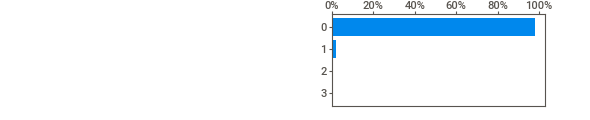
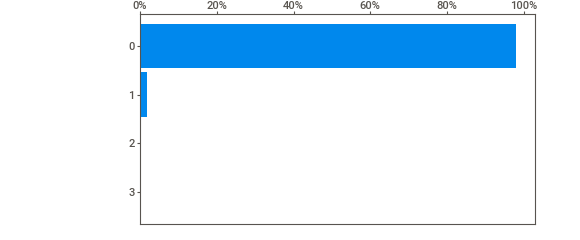
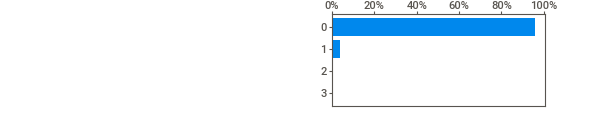
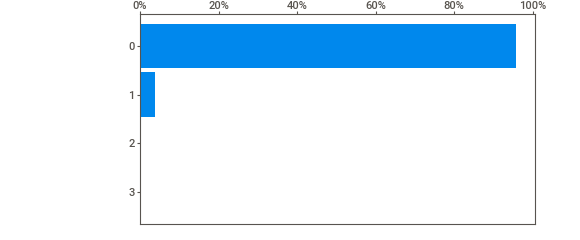
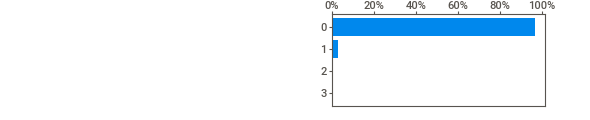
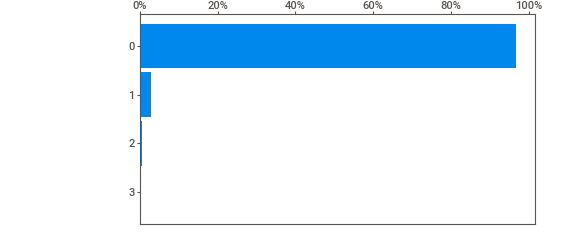
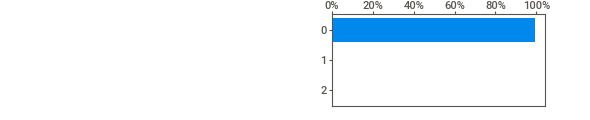
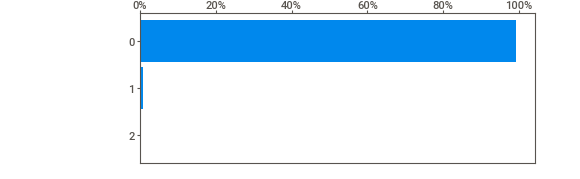
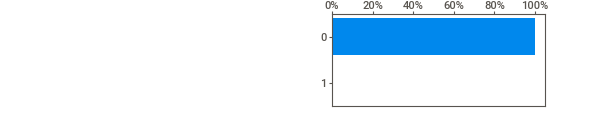
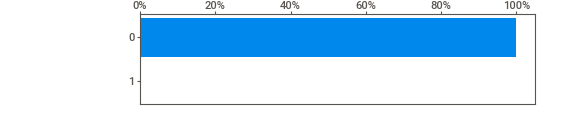
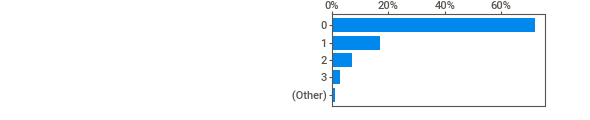
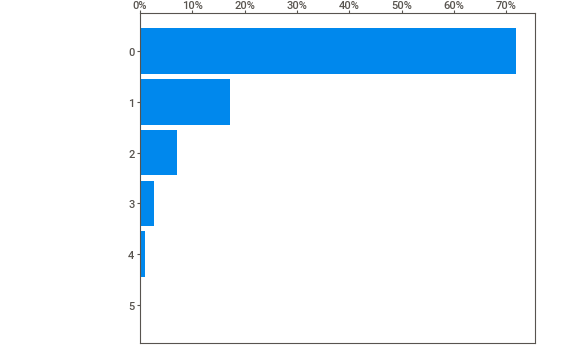
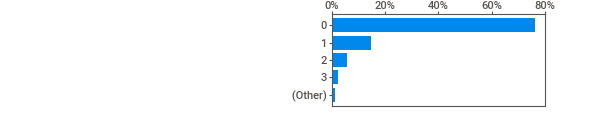
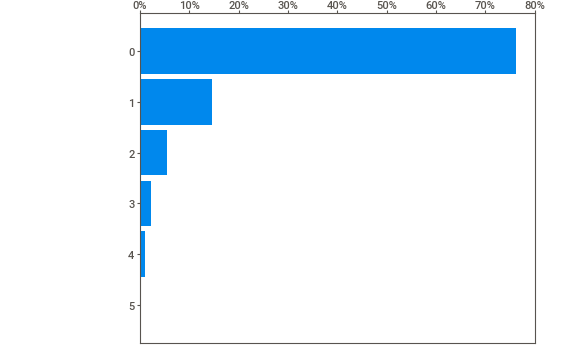
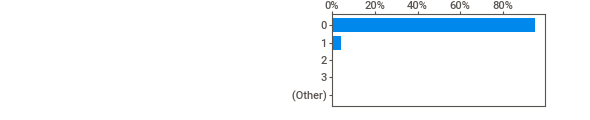
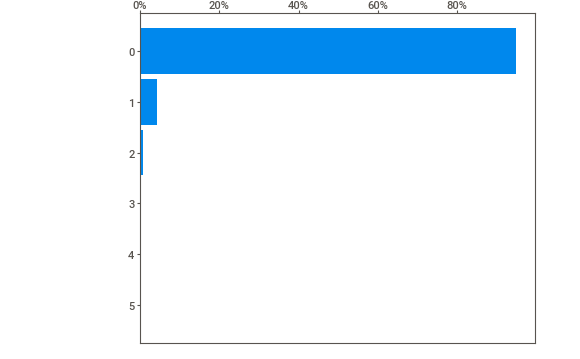
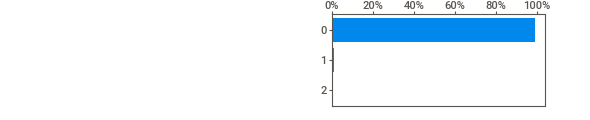
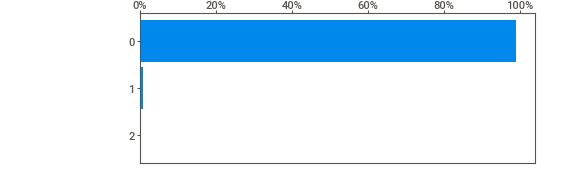
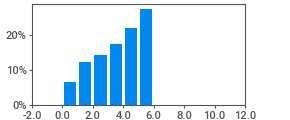
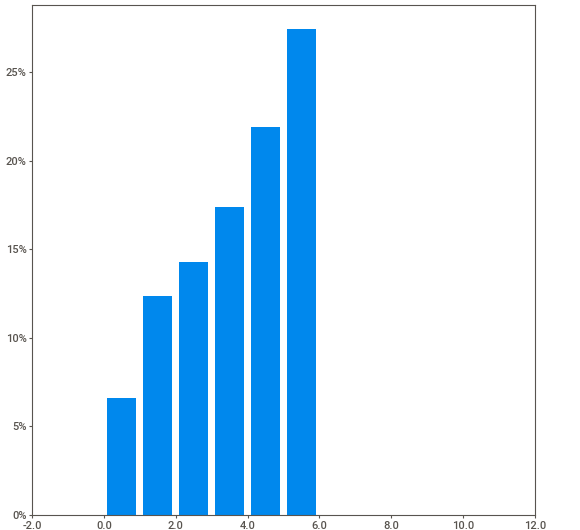
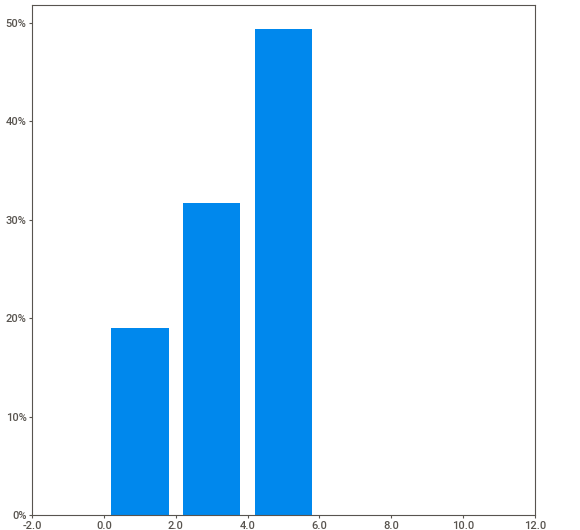
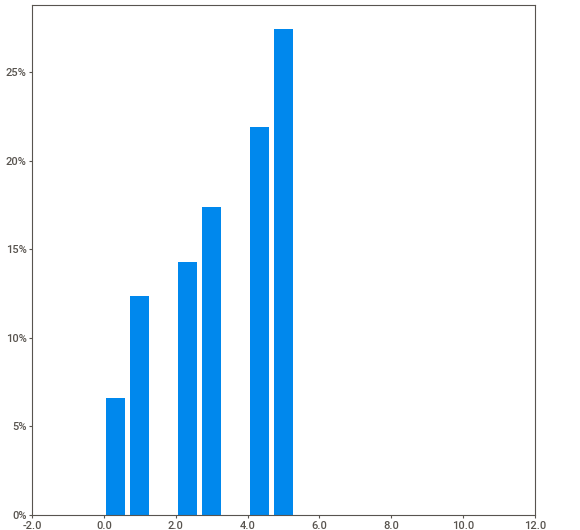
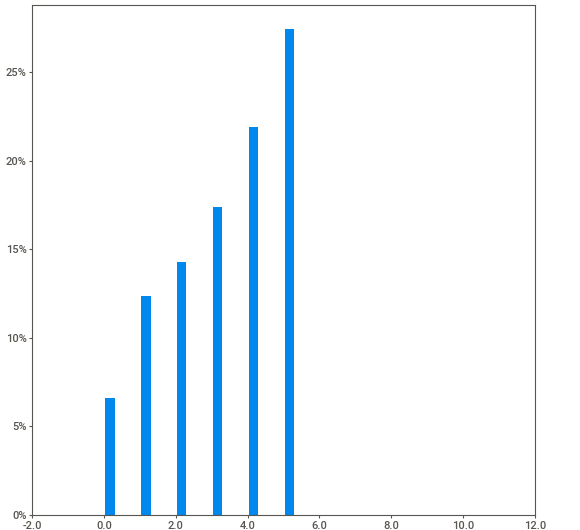
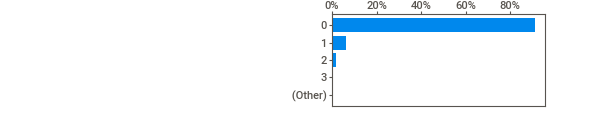
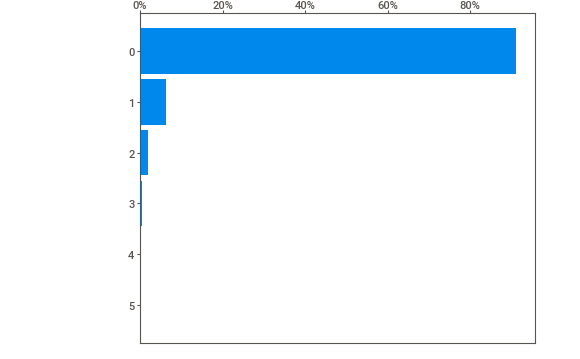
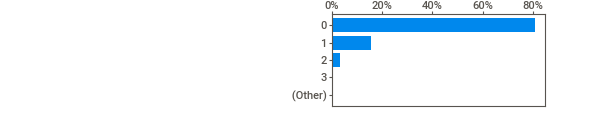
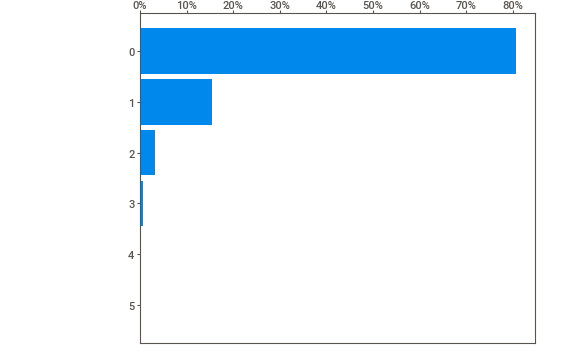
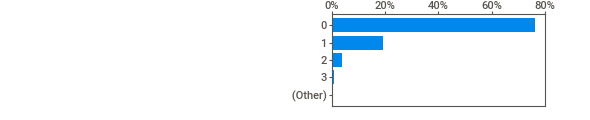
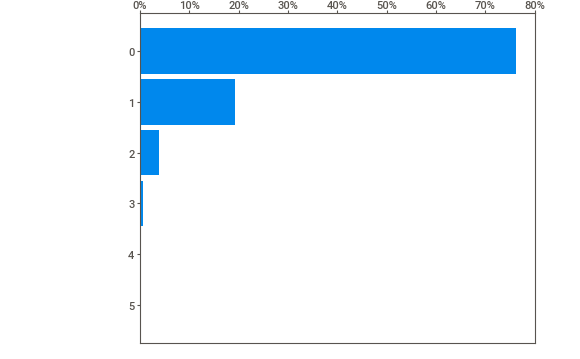
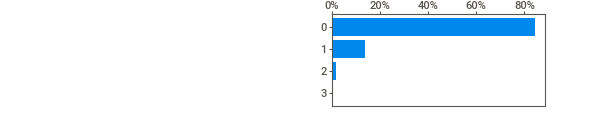
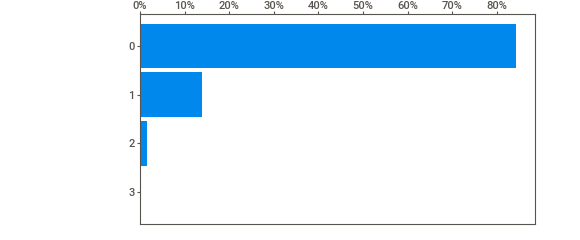
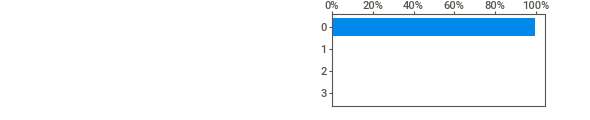
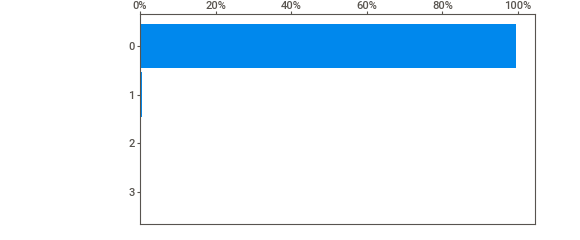
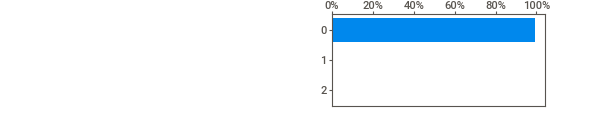
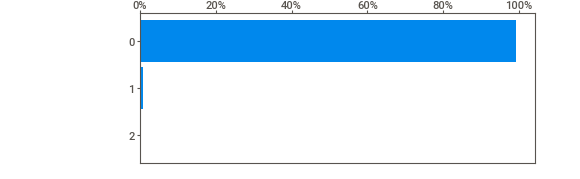
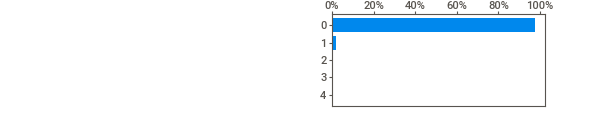
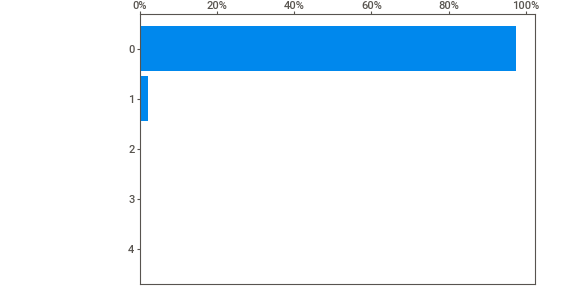
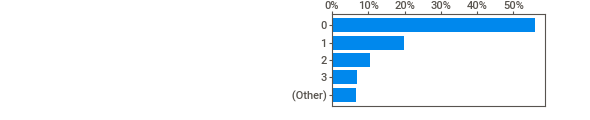
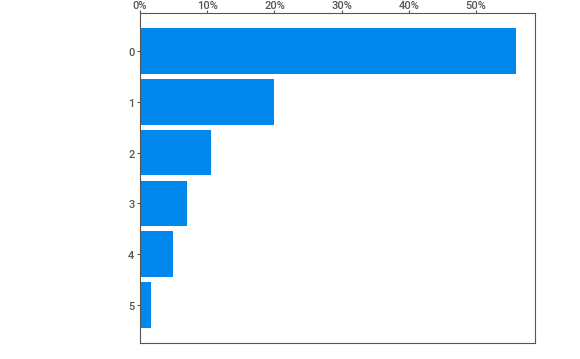
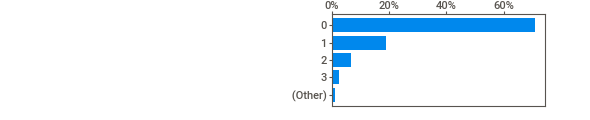
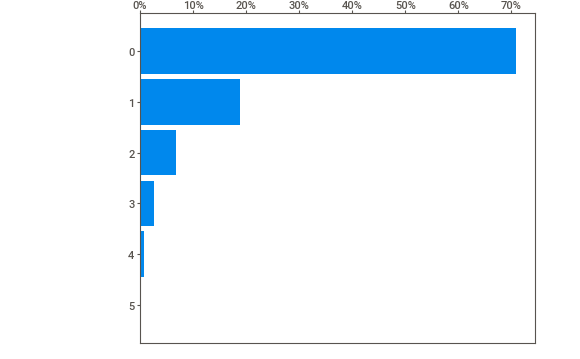
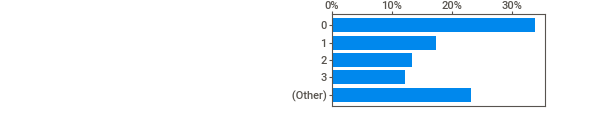
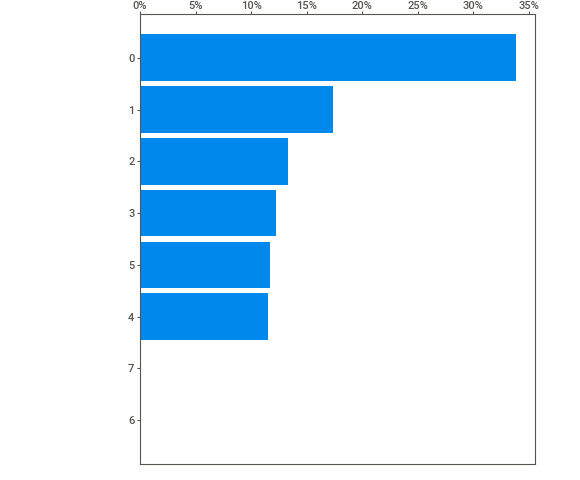
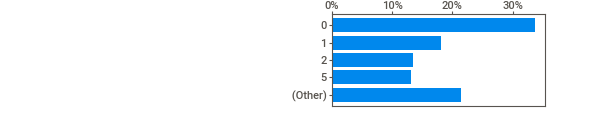
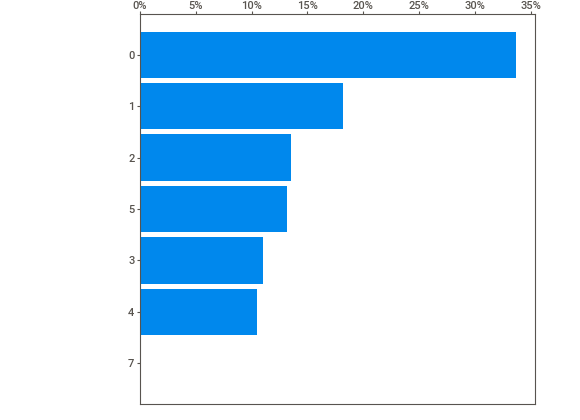
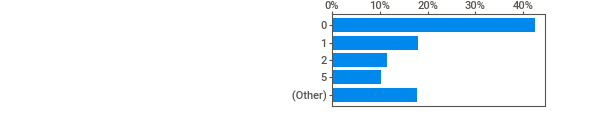
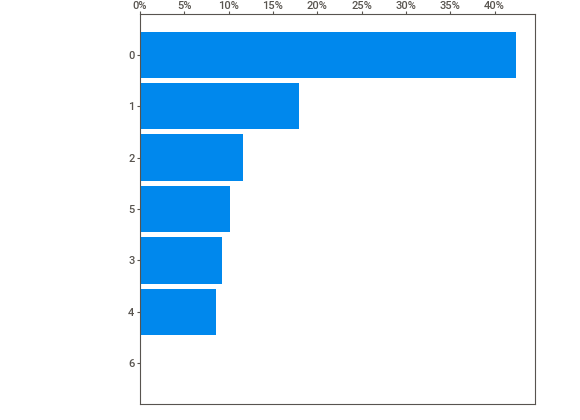
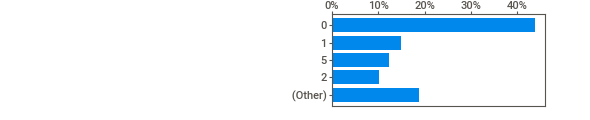
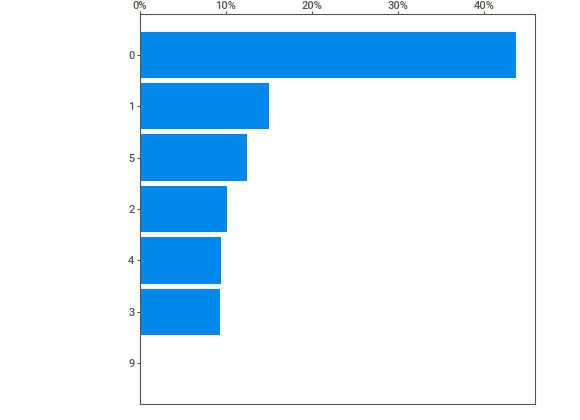
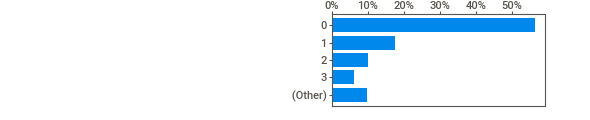
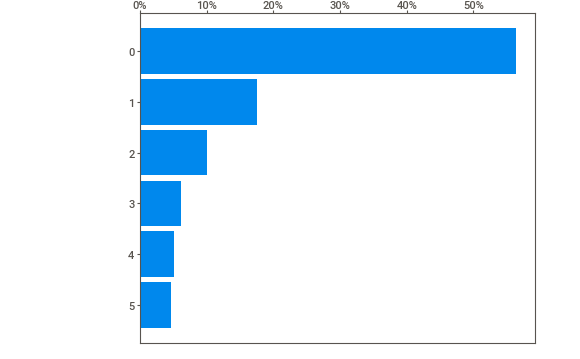
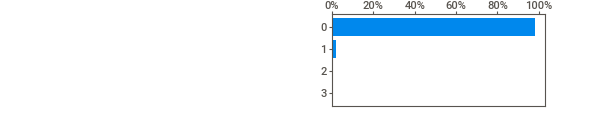
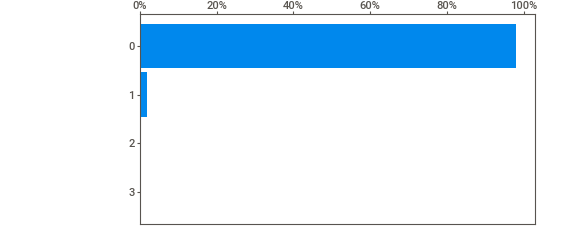
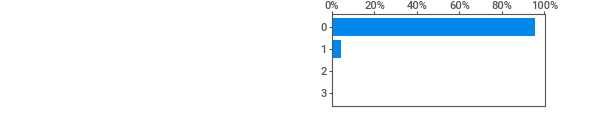
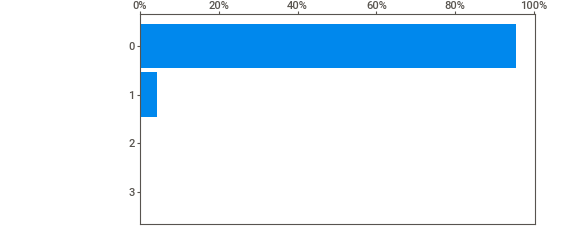
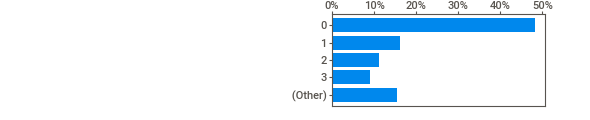
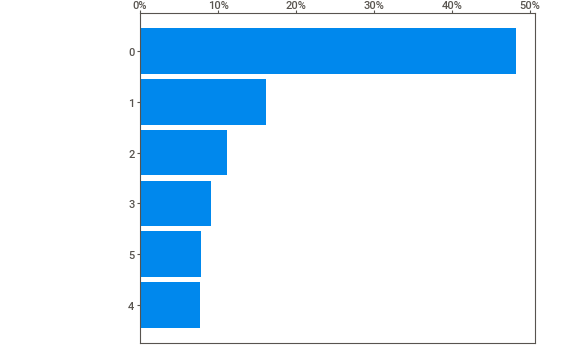
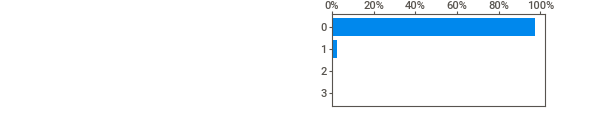
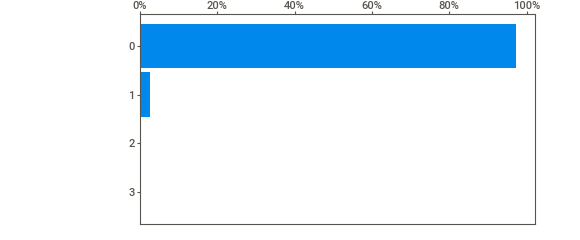
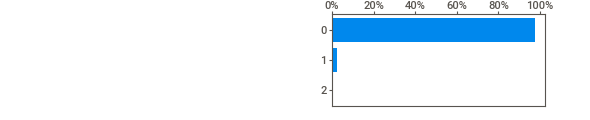
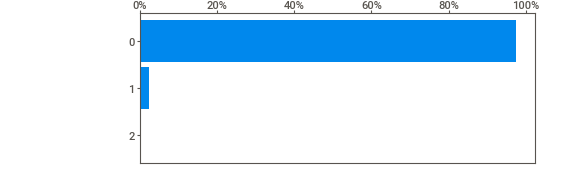
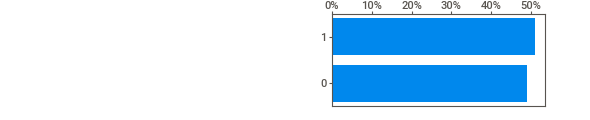
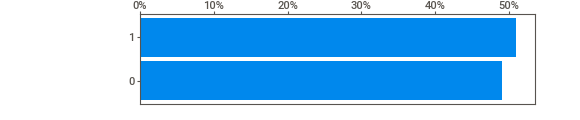
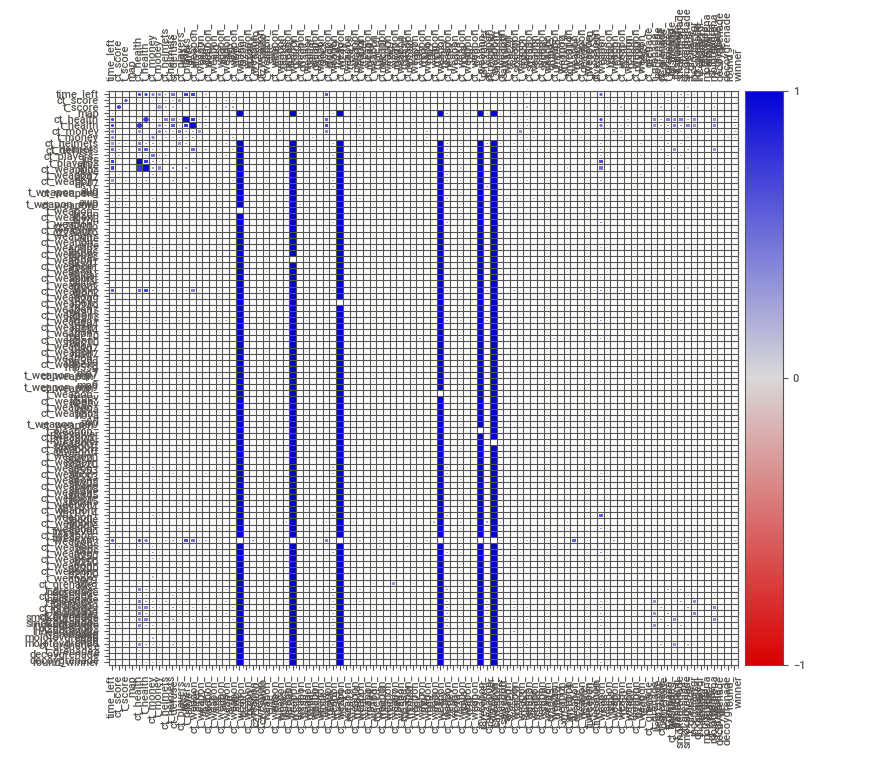
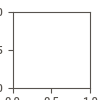

In [26]:
try: 
  my_report.show_notebook()
except:
  print("Falha ao Gerar Relatorio no Notebook")

## Mapeamento coluna Map

Para prosseguir com a base preciso mapear e converter a coluna map para um tipo string para isso 
mapei os index usando groubpy e em seguida usei a funcção do apply para fazer as trocas. 

In [178]:
base[['map','round_winner']].groupby(['map']).count().T

map           de_cache  de_dust2  de_inferno  de_mirage  de_nuke  de_overpass  \
round_winner       145     22144       23811      18576    19025        14081   

map           de_train  de_vertigo  
round_winner     13491       11137

In [179]:
maps = list(base[['map','round_winner']].groupby(['map']).count().T.to_dict().keys())

In [180]:
for dados in enumerate(maps):
     print(dados)

(0, 'de_cache')
(1, 'de_dust2')
(2, 'de_inferno')
(3, 'de_mirage')
(4, 'de_nuke')
(5, 'de_overpass')
(6, 'de_train')
(7, 'de_vertigo')


In [181]:
maps.index('de_vertigo')

7

In [182]:
base['map'] = base['map'].apply(lambda x:maps.index(x))

In [183]:
base['map'] 

0         1
1         1
2         1
3         1
4         1
         ..
122405    6
122406    6
122407    6
122408    6
122409    6
Name: map, Length: 122410, dtype: int64

In [184]:
base

time_left  ct_score  t_score  map  ct_health  t_health  ct_money  \
0          175.00         0        0    1        500       500      4000   
1          156.03         0        0    1        500       500       600   
2           96.03         0        0    1        391       400       750   
3           76.03         0        0    1        391       400       750   
4          174.97         1        0    1        500       500     18350   
...           ...       ...      ...  ...        ...       ...       ...   
122405      15.41        11       14    6        200       242       100   
122406     174.93        11       15    6        500       500     11500   
122407     114.93        11       15    6        500       500      1200   
122408      94.93        11       15    6        500       500      1200   
122409      74.93        11       15    6        375       479      1100   

        t_money  ct_helmets  t_helmets  ct_defuse_kits  ct_players_alive  \
0          4000           0          0               0                 5   
1           650           0          0               1                 5   
2           500           0          0               1                 4   
3           500           0          0               1                 4   
4         10750           0          0               1                 5   
...         ...         ...        ...             ...               ...   
122405     5950           2          4               1                 2   
122406    23900           1          2               1                 5   
122407     6700           3          5               1                 5   
122408     6700           3          5               1                 5   
122409     7000           2          5               1                 4   

        t_players_alive  ct_weapon_ak47  t_weapon_ak47  ct_weapon_aug  \
0                     5               0              0              0   
1                     5               0              0              0   
2                     4               0              0              0   
3                     4               0              0              0   
4                     5               0              0              0   
...                 ...             ...            ...            ...   
122405                4               0              1              0   
122406                5               0              0              0   
122407                5               0              2              0   
122408                5               0              2              0   
122409                5               0              2              0   

        t_weapon_aug  ct_weapon_awp  t_weapon_awp  ct_weapon_bizon  \
0                  0              0             0                0   
1                  0              0             0                0   
2                  0              0             0                0   
3                  0              0             0                0   
4                  0              0             0                0   
...              ...            ...           ...              ...   
122405             0              0             1                0   
122406             0              0             1                0   
122407             0              0             1                0   
122408             0              0             1                0   
122409             0              0             1                0   

        t_weapon_bizon  ct_weapon_cz75auto  t_weapon_cz75auto  \
0                    0                   0                  0   
1                    0                   0                  0   
2                    0                   0                  0   
3                    0                   0                  0   
4                    0                   0                  0   
...                ...                 ...                ...   
122405   

In [194]:
base['ct_score']

0          0
1          0
2          0
3          0
4          1
          ..
122405    11
122406    11
122407    11
122408    11
122409    11
Name: ct_score, Length: 122398, dtype: int64

In [155]:
def detect_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [25, 75])
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

In [188]:
base.drop(detect_outlier(base['ct_score']),inplace=True)

In [197]:
base.describe().T

count        mean         std   min     25%  \
time_left                  122398.0   97.885604   54.465466  0.01   54.92   
ct_score                   122398.0    6.709603    4.790456  0.00    3.00   
t_score                    122398.0    6.780952    4.823494  0.00    3.00   
map                        122398.0    3.520417    1.929022  0.00    2.00   
ct_health                  122398.0  412.111840  132.289775  0.00  350.00   
...                             ...         ...         ...   ...     ...   
ct_grenade_molotovgrenade  122398.0    0.048015    0.227680  0.00    0.00   
t_grenade_molotovgrenade   122398.0    1.352016    1.663186  0.00    0.00   
ct_grenade_decoygrenade    122398.0    0.027697    0.169539  0.00    0.00   
t_grenade_decoygrenade     122398.0    0.025752    0.164170  0.00    0.00   
round_winner               122398.0    0.509771    0.499907  0.00    0.00   

                              50%     75%    max  
time_left                   94.91  166.91  175.0  
ct_score                     6.00   10.00   32.0  
t_score                      6.00   10.00   33.0  
map                          3.00    5.00    7.0  
ct_health                  500.00  500.00  500.0  
...                           ...     ...    ...  
ct_grenade_molotovgrenade    0.00    0.00    3.0  
t_grenade_molotovgrenade     1.00    2.00    5.0  
ct_grenade_decoygrenade      0.00    0.00    3.0  
t_grenade_decoygrenade       0.00    0.00    2.0  
round_winner                 1.00    1.00    1.0  

[94 rows x 8 columns]

## Gerando Base para Treino

In [200]:
base.to_csv("treino_08_31_00_31-10-2021.csv",index=False)